In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
data = pd.read_csv("current.csv")
#Dropping the first row as it ins'nt required for computations
data = data.tail(-1)

data.head()

sasdate       RPI  W875RX1  DPCERA3M086SBEA    CMRMTSPLx      RETAILx  \
1  1/1/1959  2442.158   2293.2           17.272  292266.4261  18235.77392   
2  2/1/1959  2451.778   2301.5           17.452  294424.7425  18369.56308   
3  3/1/1959  2467.594   2318.5           17.617  293418.6704  18523.05762   
4  4/1/1959  2483.671   2334.9           17.553  299322.8039  18534.46600   
5  5/1/1959  2498.026   2350.4           17.765  301364.3249  18679.66354   

    INDPRO  IPFPNSS  IPFINAL  IPCONGD  ...  DNDGRG3M086SBEA  DSERRG3M086SBEA  \
1  21.9665  23.3891  22.2688  31.7011  ...           17.791           11.326   
2  22.3966  23.7048  22.4617  31.9337  ...           17.798           11.343   
3  22.7193  23.8483  22.5719  31.9337  ...           17.785           11.363   
4  23.2032  24.1927  22.9026  32.4374  ...           17.796           11.403   
5  23.5528  24.3936  23.1231  32.5925  ...           17.777           11.421   

   CES0600000008  CES2000000008  CES3000000008  UMCSENTx  DTCOLNVHFNM  \
1           2.13           2.45           2.04       NaN       6476.0   
2           2.14           2.46           2.05       NaN       6476.0   
3           2.15           2.45           2.07       NaN       6508.0   
4           2.16           2.47           2.08       NaN       6620.0   
5           2.17           2.48           2.08      95.3       6753.0   

   DTCTHFNM   INVEST  VIXCLSx  
1   12298.0  84.2043      NaN  
2   12298.0  83.5280      NaN  
3   12349.0  81.6405      NaN  
4   12484.0  81.8099      NaN  
5   12646.0  80.7315      NaN  

[5 rows x 128 columns]

In [3]:
#Checking the datatypes of the variables, to see if any of them are of object type, whcih need to be transformed for analysis and plotting

data.dtypes

sasdate             object
RPI                float64
W875RX1            float64
DPCERA3M086SBEA    float64
CMRMTSPLx          float64
                    ...   
UMCSENTx           float64
DTCOLNVHFNM        float64
DTCTHFNM           float64
INVEST             float64
VIXCLSx            float64
Length: 128, dtype: object

In [4]:
#Converting the sasdate column in the dataset to date object, to make the analysis feasible
data["sasdate"] = pd.to_datetime(data["sasdate"])

In [5]:
group_1_cols = data[["RPI","W875RX1","INDPRO","IPFPNSS","IPFINAL","IPCONGD","IPDCONGD","IPNCONGD","IPBUSEQ","IPMAT","IPDMAT","IPNMAT","IPMANSICS","IPB51222S","IPFUELS","CUMFNS"]]

#NAPMPI column not found in the dataset will have to look for it later

#Printing the Stats of all the columns in a table
group_1_cols.describe()

RPI       W875RX1      INDPRO     IPFPNSS     IPFINAL  \
count    774.000000    774.000000  774.000000  774.000000  774.000000   
mean    8843.845310   7554.539664   66.872325   71.262596   70.028678   
std     4621.809408   3677.444501   26.613334   27.141045   27.403957   
min     2442.158000   2293.200000   21.966500   23.389100   22.268800   
25%     4823.926500   4294.325000   44.595475   46.902850   44.710525   
50%     7790.795500   6811.150000   62.180700   70.926750   69.224500   
75%    12840.524500  10752.075000   93.647575   98.992600   98.036175   
max    21448.063000  14754.400000  104.118100  110.221900  108.677700   

          IPCONGD    IPDCONGD    IPNCONGD     IPBUSEQ       IPMAT      IPDMAT  \
count  774.000000  774.000000  774.000000  774.000000  774.000000  774.000000   
mean    78.711689   65.959528   84.073214   52.364088   62.104042   51.290001   
std     23.412666   28.375945   21.124999   33.454614   26.817814   32.462015   
min     31.701100   17.392900   38.150100    8.043400   19.086800   10.701100   
25%     61.187925   41.765325   67.989825   20.016500   41.061750   23.308300   
50%     80.288350   60.034500   90.127800   42.196500   53.188350   33.824550   
75%    100.263225   95.703850  101.658850   86.395975   88.177975   87.250875   
max    111.785000  110.128800  113.912500  105.601500  106.711200  104.339100   

           IPNMAT   IPMANSICS   IPB51222S     IPFUELS      CUMFNS  
count  774.000000  774.000000  774.000000  774.000000  774.000000  
mean    86.538664   66.873507   73.577780   67.710742   79.346638  
std     23.024642   27.969144   26.848994   17.950470    5.030066  
min     30.659100   20.761600   19.863100   33.445600   62.248700  
25%     74.583225   42.806875   54.130575   58.111300   76.167800  
50%     97.681350   62.148600   74.967850   65.927650   79.041500  
75%    102.129850   96.614350   98.687325   83.011725   82.713200  
max    116.041700  108.398300  117.702700  103.145000   91.637900

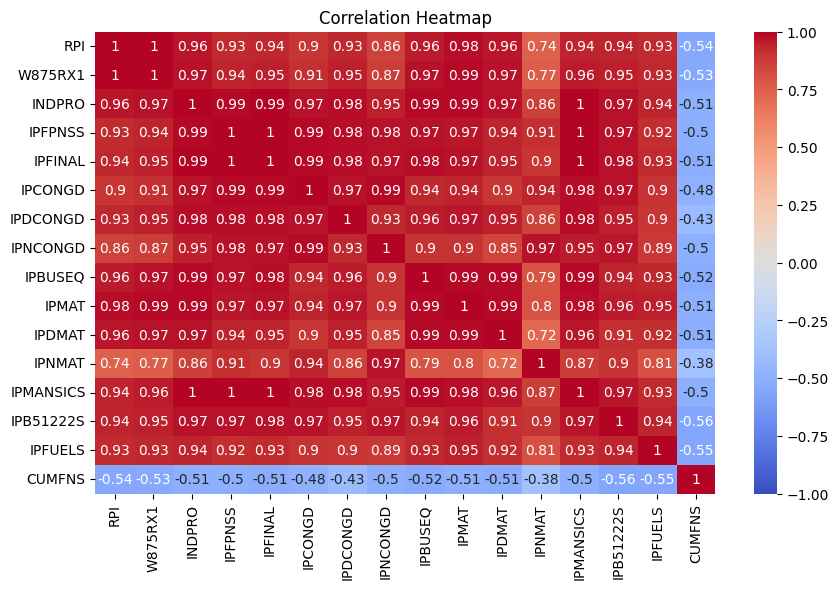

In [6]:
correlation_matrix = group_1_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<h3>Analysis for Group 1</h3>

  <li><strong>Strong Positive Correlation:</strong> Many of the factors in Group 1 have a high positive association with one another. IPFPNSS, IPFINAL, IPCONGD, and IPNCONGD, for example, are all significantly connected. This suggests that they are measuring similar characteristics of industrial production and economic activity.</li>
  
  <li><strong>Mixed Correlations with <code>CUMFNS</code>:</strong> The variable CUMFNS/code> has a mixed relationship with other metrics. It has a significant positive relationship with some, such as IPBUSEQ, but a weak or non-existent association with others, such as W875RX1. This implies that CUMFNS may represent a different component of the economy that does not always correspond to larger industrial production indices.
</li>

  <li><strong>Distinct Clusters:</strong> The heatmap reveals a distinct cluster of strongly inter-correlated variables, implying that many of these indices capture similar underlying economic trends.</li>
</ul>


In [7]:
group_2_cols = data[["HWI","HWIURATIO","CLF16OV","CE16OV","UNRATE","UEMPMEAN","UEMPLT5","UEMP5TO14","UEMP15OV","UEMP15T26","UEMP27OV","CLAIMSx","PAYEMS","USGOOD","CES1021000001","USCONS","MANEMP","DMANEMP","NDMANEMP","SRVPRD","USTPU","USWTRADE","USTRADE","USFIRE","USGOVT","CES0600000007","AWOTMAN","AWHMAN","CES0600000008","CES2000000008","CES3000000008"]]

#NAPMEI column not found in the dataset will have to look for it later

group_2_cols.describe()



HWI   HWIURATIO        CLF16OV         CE16OV      UNRATE  \
count    773.000000  773.000000     774.000000     774.000000  774.000000   
mean    4098.758085    0.638433  121633.948320  114402.346253    5.926615   
std     1775.204913    0.330798   31164.348583   29460.904707    1.677132   
min     1357.000000    0.152866   67649.000000   63684.000000    3.400000   
25%     3041.000000    0.410485   93137.250000   86635.750000    4.800000   
50%     3878.000000    0.552821  126152.000000  118192.500000    5.600000   
75%     4731.000000    0.777399  153026.500000  140168.500000    7.000000   
max    12027.000000    2.013898  166951.000000  161031.000000   14.700000   

         UEMPMEAN       UEMPLT5     UEMP5TO14     UEMP15OV    UEMP15T26  ...  \
count  774.000000    774.000000    774.000000   774.000000   774.000000  ...   
mean    17.381654   2614.728682   2115.656331  2501.866925  1036.900517  ...   
std      7.340733    730.214069    903.529564  1829.197781   598.233844  ...   
min      7.100000   1431.000000    653.000000   339.000000   191.000000  ...   
25%     12.600000   2214.250000   1640.000000  1293.250000   680.750000  ...   
50%     15.400000   2622.500000   2151.000000  2168.000000   986.000000  ...   
75%     19.500000   3043.500000   2525.750000  2970.250000  1260.750000  ...   
max     40.700000  14232.000000  14806.000000  9130.000000  6580.000000  ...   

          USWTRADE       USTRADE       USFIRE        USGOVT  CES0600000007  \
count   774.000000    774.000000   774.000000    774.000000     774.000000   
mean   4752.211111  11851.297287  6091.102067  17537.981912      40.293540   
std    1088.977000   3492.190845  2092.125496   4437.362359       0.644639   
min    2568.700000   5350.300000  2418.000000   8105.000000      37.200000   
25%    3798.325000   8574.500000  4035.250000  14748.750000      39.900000   
50%    5141.800000  12963.400000  6581.500000  18549.500000      40.300000   
75%    5681.725000  15045.600000  7937.250000  21851.500000      40.800000   
max    6050.600000  15876.800000  9144.000000  22996.000000      41.600000   

          AWOTMAN      AWHMAN  CES0600000008  CES2000000008  CES3000000008  
count  774.000000  774.000000     774.000000     774.000000     774.000000  
mean     3.744315   40.780233      12.326990      14.315607      11.388837  
std      0.717468    0.732703       7.582378       8.487248       6.843334  
min      2.000000   37.300000       2.130000       2.450000       2.040000  
25%      3.200000   40.400000       4.992500       6.625000       4.592500  
50%      3.800000   40.700000      11.690000      13.630000      11.025000  
75%      4.300000   41.300000      18.622500      20.877500      17.222500  
max      5.200000   42.300000      29.550000      34.090000      26.410000  

[8 rows x 31 columns]

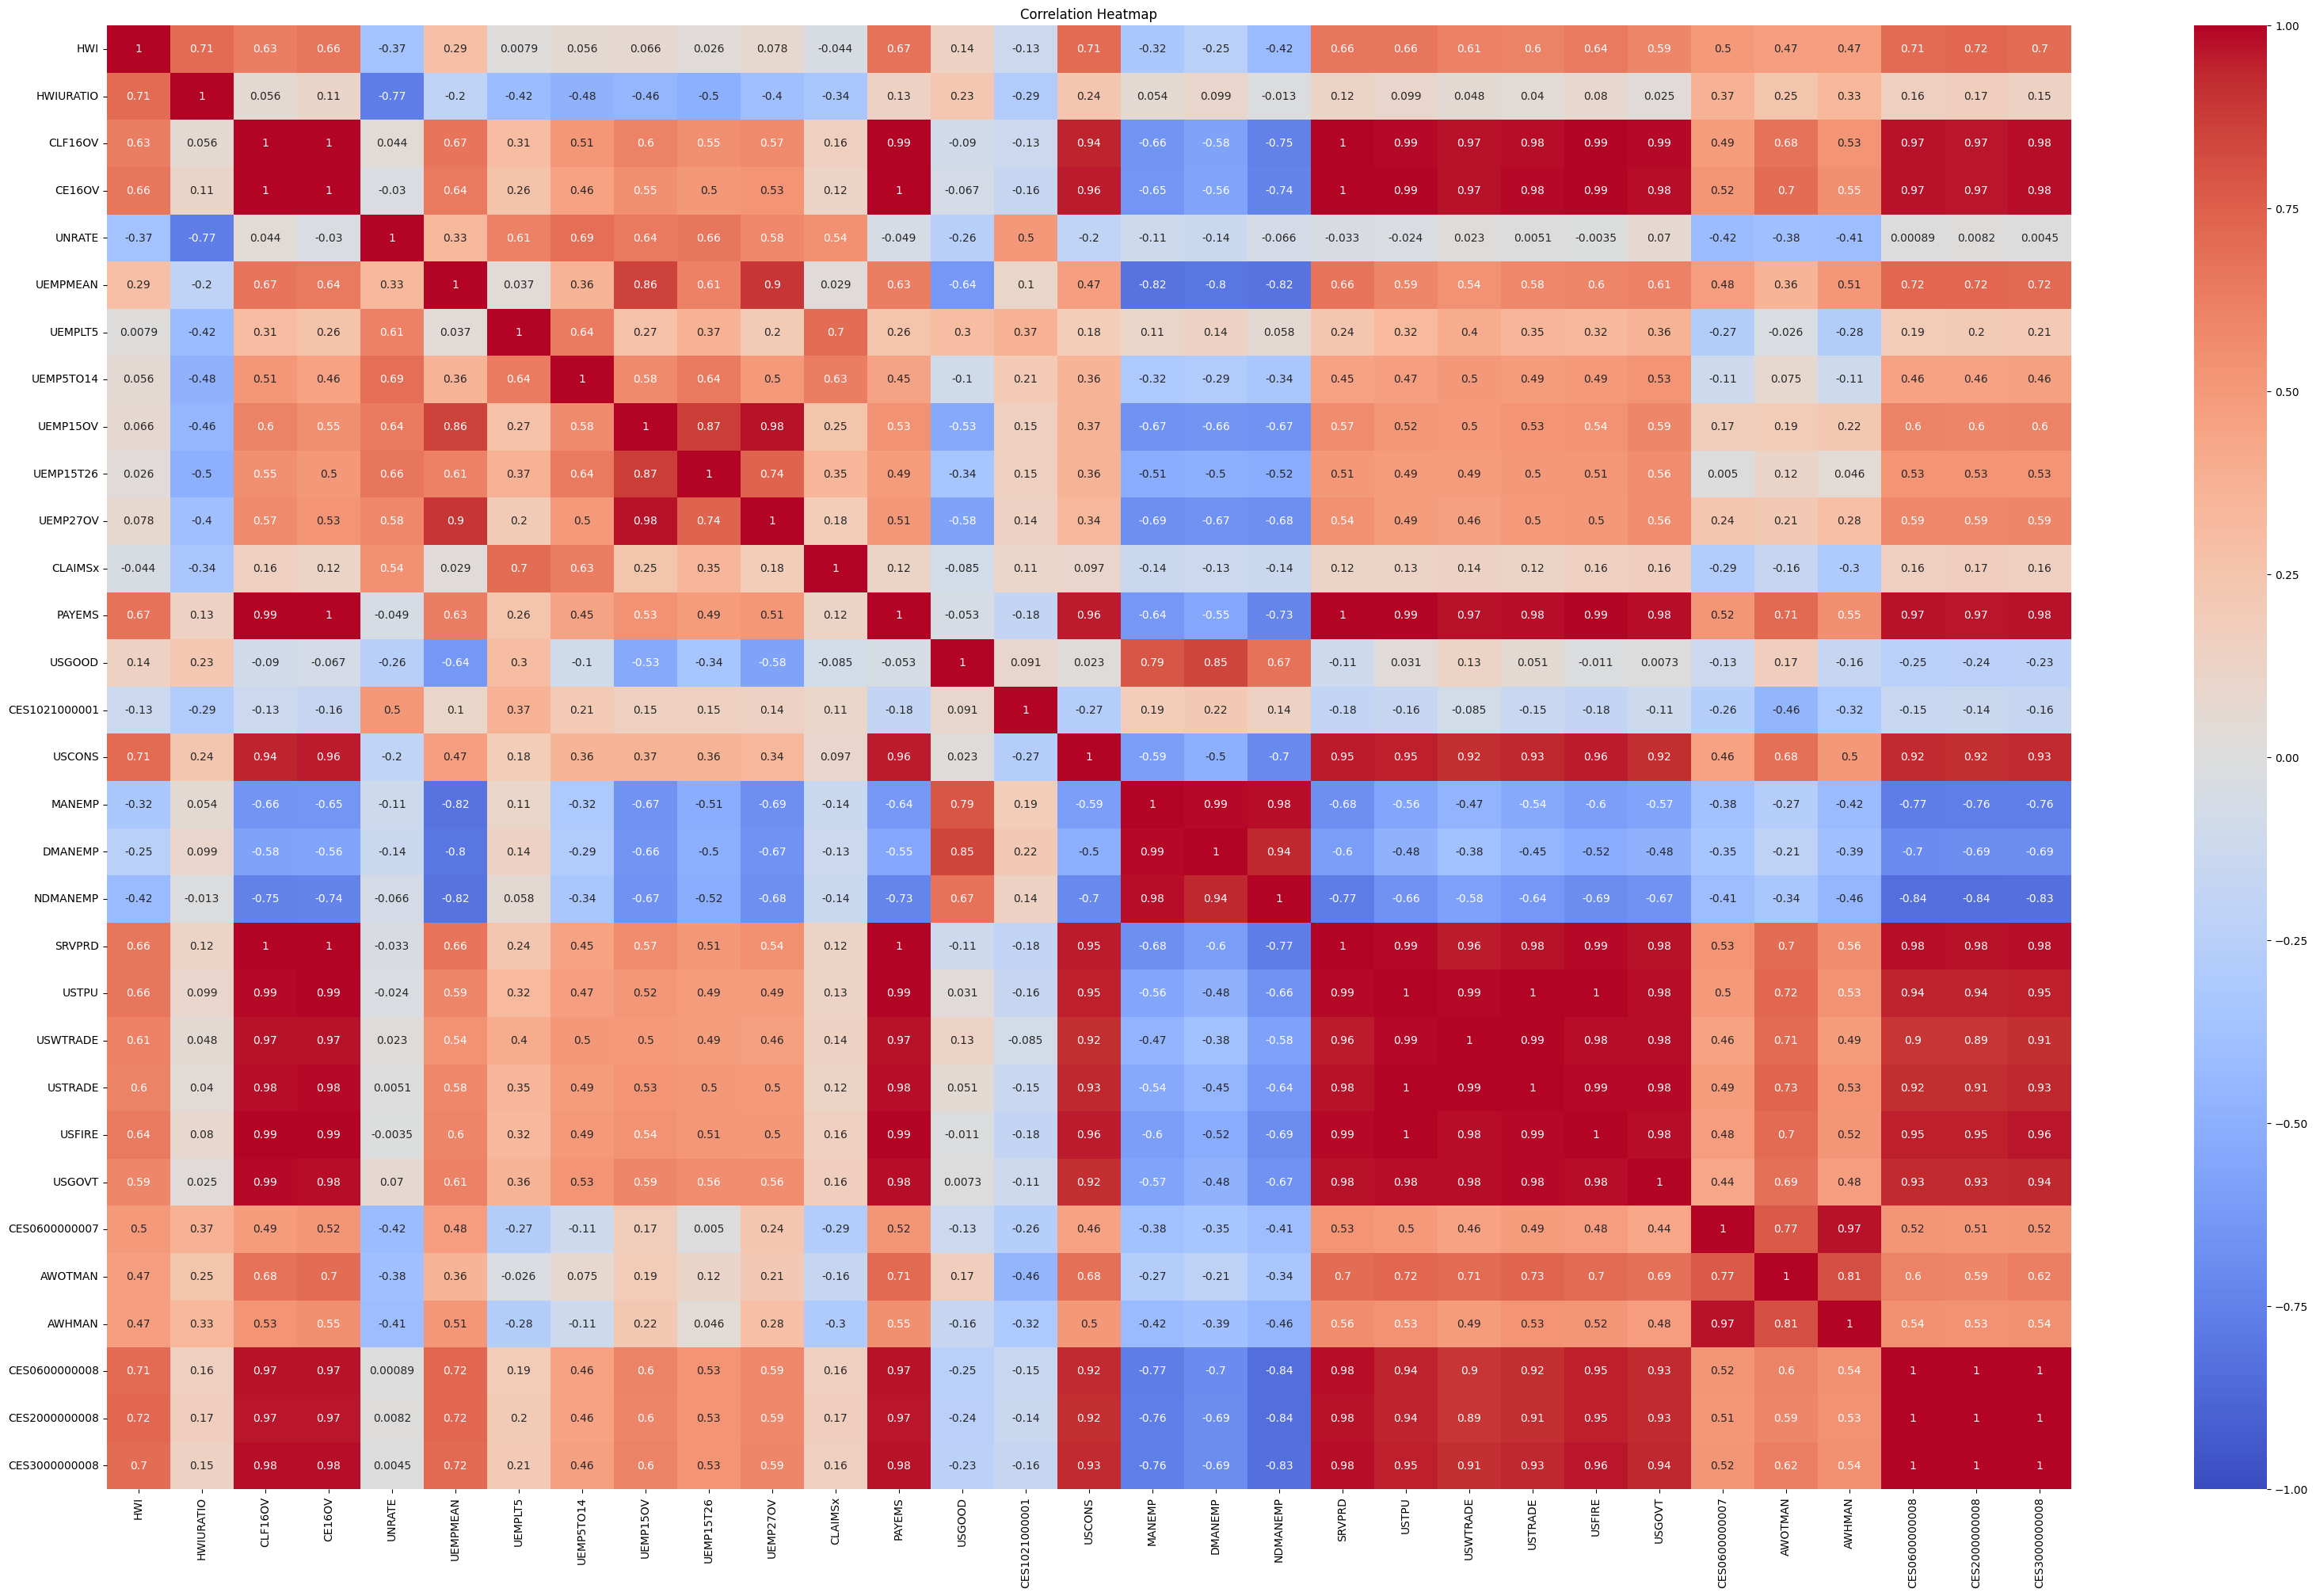

In [103]:
correlation_matrix = group_2_cols.corr()

# Plot the heatmap
plt.figure(figsize=(40, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


<H2> Analysis for group 2 </H2>
<ol>
    <li><strong>Descriptive Stats:</strong>
        <ul>
            <li>TThe average number of new private dwelling units authorised by construction permits (PERMIT) is around 1,363, with a maximum of 2,263 and a minimum of just 4, demonstrating the housing market's volatility.
</li>
            <li>AMDMUOx, which indicates new orders for consumer goods from manufacturers, has the highest standard deviation, indicating swings in consumer goods demand.
</li>
            <li>The Northeast (PERMITNE) and Midwest (PERMITMW) have fewer permits than the South (PERMITS) and West (PERMITW), reflecting regional variances in housing demand.
</li>
        </ul>
    </li>
    <li><strong>Correlation Heatmap Insights:</strong>
        <ul>
            <li>Permit-related variables (such as PERMIT, PERMITNE, PERMITMW, and so on) have high positive relationships. This implies that when one region sees an increase in housing demand, others are likely to follow.
</li>
            <li>AMDMUOx (manufacturers' new orders for consumer goods) has a modest relationship with the permit-related variables, implying that an increase in housing permits may be accompanied by an increase in consumer goods orders.
</li>
            <li>ACOGNO (value of new orders from manufacturers in the consumer goods industry) has a lesser association with other factors. This implies that, while there is a link, variables other than the housing market influence manufacturers' new orders.
</li>
        </ul>
    </li>
</ol>


In [9]:
group_3_cols = data[["HOUST","HOUSTNE","HOUSTMW","HOUSTS","HOUSTW","PERMIT","PERMITNE","PERMITMW","PERMITS","PERMITW"]]

group_3_cols.describe()

HOUST     HOUSTNE    HOUSTMW       HOUSTS      HOUSTW  \
count   774.000000  774.000000  774.00000   774.000000  774.000000   
mean   1433.372093  171.193798  276.26615   640.173127  345.746770   
std     383.915257   67.648365   98.88472   181.724942  109.530637   
min     478.000000   36.000000   59.00000   230.000000   79.000000   
25%    1198.500000  123.000000  203.00000   513.250000  272.250000   
50%    1459.500000  157.000000  283.50000   624.000000  346.500000   
75%    1653.750000  219.750000  345.75000   768.000000  420.000000   
max    2494.000000  395.000000  590.00000  1187.000000  645.000000   

            PERMIT    PERMITNE    PERMITMW      PERMITS     PERMITW  
count   762.000000  762.000000  762.000000   762.000000  762.000000  
mean   1369.964567  171.985564  258.518373   587.792651  351.669291  
std     381.155353   63.454277   85.995112   199.295959  113.202310  
min     513.000000   54.000000   77.000000   215.000000   97.000000  
25%    1118.000000  126.000000  194.000000   422.250000  275.000000  
50%    1349.500000  163.000000  256.000000   576.000000  349.000000  
75%    1651.000000  211.000000  319.750000   730.750000  421.000000  
max    2419.000000  426.000000  507.000000  1104.000000  759.000000

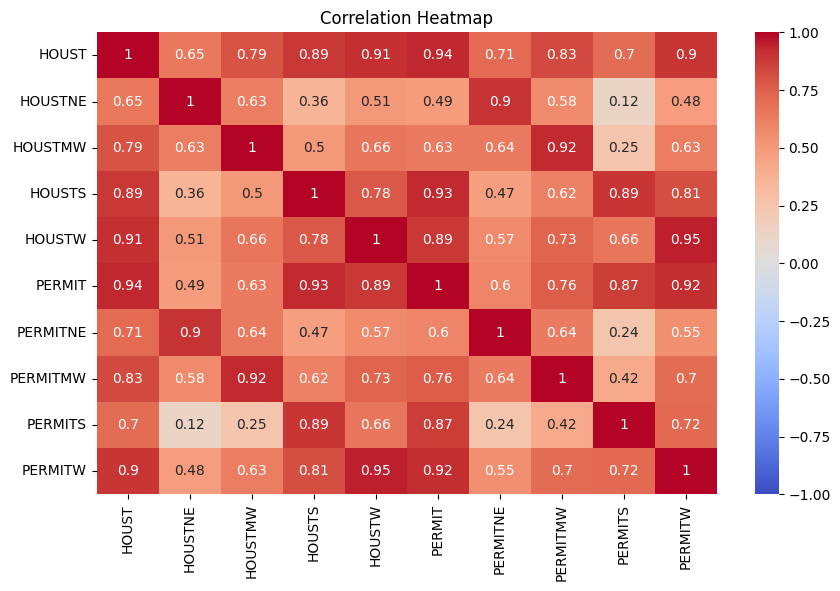

In [10]:
correlation_matrix = group_3_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<H2> Analysis for Group 3 </H2>

<ol>
    <li><strong>Descriptive Statistics</strong>:</li>
    <ul>
        <li>The average housing starts (<code>HOUST</code>) across all regions over the time period is approximately 1432 (in thousands).</li>
        <li>Region-wise, the Southern region (<code>HOUSTS</code>) consistently has the highest average housing starts at around 639 (in thousands), followed by the Western region (<code>HOUSTW</code>) at around 345 (in thousands). The Northeast (<code>HOUSTNE</code>) has the lowest average at about 171 (in thousands).</li>
        <li>Similarly, for permits (<code>PERMIT</code>), the average is approximately 1368 (in thousands) across all regions. The pattern of regional distribution for permits is similar to that of housing starts.</li>
    </ul>
    <li><strong>Correlation Heatmap Insights</strong>:</li>
    <ul>
        <li>Housing starts and permits have a very significant positive association across all regions, which is to be expected given that permits are a leading indicator for housing beginnings.
</li>
        <li>Regional home starts and permits are also strongly connected with total US values. This suggests that regional housing activity frequently moves in lockstep with overall housing market movements in the United States.
</li>
    </ul>
    <li><strong>Economic Insights</strong>:</li>
    <ul>
        <li>The significant link between permits and house starts emphasises the sequential character of the home building process: permits are often obtained prior to the start of work, making them a leading indicator of housing beginnings.
</li>
        <li>The similarities in regional and national housing activity patterns show that overarching national economic and policy factors frequently influence regional housing markets in a coordinated manner.
</li>
        <li>The Southern area has the most activity in terms of both starts and permits. This could be due to a multitude of causes such as the region's favourable environment, economic prospects, or population growth trends.
</li>
    </ul>
</ol>

In [11]:
group_4_cols = data[["DPCERA3M086SBEA","CMRMTSPLx","RETAILx","ACOGNO","AMDMNOx","ANDENOx","AMDMUOx","BUSINVx","ISRATIOx","UMCSENTx"]]

#"NAPM","NAPMNOI","NAPMSDI","NAPMII" not in the dataset

group_4_cols.describe()

DPCERA3M086SBEA     CMRMTSPLx        RETAILx         ACOGNO  \
count       774.000000  7.730000e+02     774.000000     376.000000   
mean         62.632401  8.546655e+05  212286.108801  159994.776596   
std          33.233315  3.974097e+05  177042.996956   43507.474496   
min          17.272000  2.809324e+05   18235.773920   86445.000000   
25%          32.520750  5.131828e+05   48575.059215  121043.000000   
50%          54.681500  7.551120e+05  161015.775000  165299.500000   
75%          95.098000  1.222861e+06  351563.750000  197162.000000   
max         130.878000  1.585920e+06  692501.000000  262384.000000   

             AMDMNOx        ANDENOx       AMDMUOx       BUSINVx    ISRATIOx  \
count     774.000000     665.000000  7.740000e+02  7.730000e+02  773.000000   
mean   125911.239716   45996.731097  4.969304e+05  8.903138e+05    1.471971   
std     80610.216541   24874.086045  3.822458e+05  6.505485e+05    0.121426   
min     13253.957810    6010.041362  3.937935e+04  8.488956e+04    1.240000   
25%     42639.897192   24695.128260  1.567916e+05  2.770844e+05    1.380000   
50%    119887.089650   49227.000000  4.381600e+05  8.096000e+05    1.487682   
75%    196380.750000   66827.000000  8.291425e+05  1.358012e+06    1.560000   
max    302489.000000  136828.000000  1.325307e+06  2.545835e+06    1.756291   

         UMCSENTx  
count  620.000000  
mean    85.549194  
std     12.966641  
min     50.000000  
25%     75.925000  
50%     89.300000  
75%     94.925000  
max    112.000000

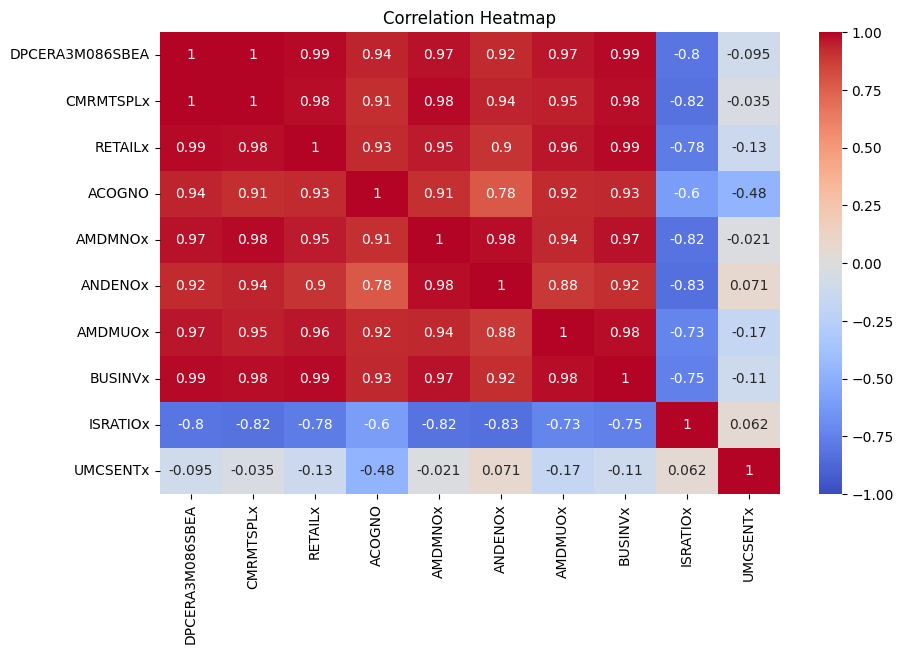

In [12]:
correlation_matrix = group_4_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<H2> Analysis for group 4 </H2>

<ul>
    <li>Real personal consumption expenditures (DPCERA3M086SBEA) and Real Manufacturing and Trade Industries Sales (CMRMTSPLx) are closely connected with Retail and Food Services Sales (RETAILx). This implies that overall consumer spending is inextricably connected to manufacturing and commerce activity.</li>
    <li>Advance Real Retail and Food Service Sales (ACOGNO) have a high positive link with Manufacturers' New Orders: Durable Goods (AMDMNOx). This suggests that when consumers are upbeat and place more orders, manufacturers experience an increase in new orders for durable items..</li>
    <li>The Many variables have a significant negative link with the Inventories to Sales Ratio (ISRATIOx). When Real Manufacturing and Trade Industries Sales (CMRMTSPLx) are high, for example, the inventory-to-sales ratio is lower, indicating efficient inventory management and higher sales turnover.</li>
</ul>


In [13]:
group_5_cols = data[["M1SL","M2SL","M2REAL","TOTRESNS","NONBORRES","BUSLOANS","REALLN","NONREVSL","CONSPI","DTCOLNVHFNM","DTCTHFNM","INVEST"]]

#"['AMBSL', 'MZMSL'] not in index" missing cols

group_5_cols.describe()

M1SL          M2SL       M2REAL     TOTRESNS     NONBORRES  \
count    774.000000    774.000000   774.000000   774.000000  7.740000e+02   
mean    1935.774806   5065.972739  2896.081008   536.460982  5.198876e+05   
std     4038.388733   5317.163050  1581.627295  1001.421762  9.908993e+05   
min      138.900000    286.600000   987.900000    18.000000 -3.335000e+05   
25%      275.300000    916.825000  1842.975000    34.625000  3.342500e+04   
50%      840.900000   3327.150000  2416.250000    44.000000  4.285000e+04   
75%     1378.300000   7241.875000  3510.075000    61.900000  6.027500e+04   
max    20664.200000  21703.600000  7671.800000  4193.200000  4.149900e+06   

          BUSLOANS       REALLN     NONREVSL      CONSPI    DTCOLNVHFNM  \
count   774.000000   774.000000   773.000000  773.000000     773.000000   
mean    810.618411  1530.446356   971.777221    0.134705  127336.182975   
std     744.012423  1643.432466   984.124048    0.018403  123558.739257   
min      35.130400    24.924200    48.961160    0.092865    6476.000000   
25%     182.142875   130.768500   185.641860    0.123173   10746.000000   
50%     606.823000   859.024200   547.324640    0.134025   78416.000000   
75%    1188.723025  3419.239350  1552.343260    0.149916  262442.990000   
max    3035.875300  5454.966500  3612.659360    0.165886  395393.700000   

            DTCTHFNM       INVEST  
count     773.000000   774.000000  
mean   335664.558784  1248.729361  
std    323001.832563  1383.063921  
min     12298.000000    71.186400  
25%     33769.000000   173.465325  
50%    187194.710000   641.997450  
75%    724770.310000  2025.284950  
max    896985.060000  5836.411700

In [14]:
correlation_matrix = group_5_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<h2> Analysis for Group 5 </h2>
<h4>Descriptive Stats:</h4>
<ul>
    <li>M1SL and M2SL have risen significantly over time, demonstrating the expansion of the economy(s) money supply.</li>
    <li>BUSLOANS (Business loans) and REALLN (Real estate loans) have substantially higher magnitudes than other indicators, highlighting their importance in the broader credit market.</li>
    <li>CONSPI (Commercial paper interest rate spread) has a narrow range of 0.09 to 2, demonstrating generally steady interest rate spreads throughout time.
</li>
</ul>

<h4>Correlation Heatmap Insights:</h4>
<ul>
    <li>M1SL and M2SL show a high positive link with BUSLOANS and REALLN, implying that as the money supply expands, so will credit in the form of business and real estate loans.
</li>
    <li> TOTRESNS (Total reserves of depository institutions) has a significantly weaker association with other indicators, showing that it has its own dynamics.</li>
    <li>TOTRESNS (Total reserves of depository institutions) has a significantly weaker association with other indicators, showing that it has its own dynamics.</li>
    
</ul>

<p>Given these observations, the relationship between money supply (like <strong>M1SL</strong> and <strong>M2SL</strong>) and credit market metrics (like <strong>BUSLOANS</strong> and <strong>REALLN</strong>) is evident. As liquidity in the economy increases, credit availability and uptake also seem to rise.</p>


In [15]:
group_6_cols = s#TWEXMMTH is missing
group_6_data = data[group_6_cols]

group_6_data.describe()

FEDFUNDS       CP3Mx       TB3MS       TB6MS         GS1         GS5  \
count  774.000000  773.000000  774.000000  774.000000  774.000000  774.000000   
mean     4.767028    4.896223    4.346486    4.486848    4.843178    5.488579   
std      3.662049    3.451042    3.157798    3.147553    3.359598    3.124921   
min      0.050000    0.090000    0.010000    0.040000    0.050000    0.270000   
25%      1.915000    2.370000    1.912500    2.045000    2.332500    3.312500   
50%      4.630000    4.880000    4.435000    4.600000    4.885000    5.195000   
75%      6.537500    6.590000    5.960000    6.145000    6.647500    7.407500   
max     19.100000   18.070000   16.300000   15.520000   16.720000   15.930000   

             GS10         AAA         BAA   COMPAPFFx  ...    TB6SMFFM  \
count  774.000000  774.000000  774.000000  773.000000  ...  774.000000   
mean     5.804341    6.805556    7.807778    0.123092  ...   -0.279806   
std      2.936921    2.704539    2.932490    0.430362  ...    0.757080   
min      0.620000    2.140000    3.160000   -2.780000  ...   -5.010000   
25%      3.852500    4.450000    5.235000   -0.010000  ...   -0.500000   
50%      5.405000    6.635000    7.555000    0.100000  ...   -0.050000   
75%      7.527500    8.447500    9.367500    0.320000  ...    0.087500   
max     15.320000   15.490000   17.180000    2.220000  ...    1.280000   

           T1YFFM      T5YFFM      T5YFFM      AAAFFM      BAAFFM     EXSZUSx  \
count  774.000000  774.000000  774.000000  774.000000  774.000000  774.000000   
mean     0.076525    0.721886    0.721886    2.038889    3.041124    2.108691   
std      0.760319    1.322173    1.322173    1.892812    1.990330    1.245256   
min     -5.000000   -6.310000   -6.310000   -6.270000   -4.050000    0.780000   
25%     -0.100000    0.122500    0.122500    0.980000    1.820000    1.165250   
50%      0.140000    0.865000    0.865000    2.170000    3.110000    1.537300   
75%      0.450000    1.580000    1.580000    3.360000    4.485000    2.702100   
max      1.750000    3.160000    3.160000    5.730000    8.820000    4.349000   

          EXJPUSx     EXUSUKx     EXCAUSx  
count  774.000000  774.000000  774.000000  
mean   194.704029    1.880934    1.194431  
std    102.110144    0.494774    0.161746  
min     76.643000    1.093100    0.947800  
25%    110.038075    1.527475    1.072800  
50%    133.827550    1.690250    1.178700  
75%    291.601350    2.345425    1.322575  
max    362.976400    2.816500    1.599700  

[8 rows x 21 columns]

In [16]:
correlation_matrix = group_6_data.corr()

plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Analysis for Group 6 (Interest and Exchange Rates):

1. **Descriptive Statistics:**
    * The Federal Funds Rate (FEDFUNDS) has historically fluctuated greatly, ranging from 0.05% to 19.1%.

    * Exchange rates, particularly for the Japanese Yen (EXJPUSx), vary greatly, with an average rate of roughly 194.57 and a         wide range of 5 to 362.9764.

    * COMPAPFFx, the commercial paper rate over the federal funds rate, has an intriguing distribution, with values ranging            from just above zero to negatives.

    
2. **Correlation Analysis:**
    * Interest rates (FED FUNDS, GS1, GS5, GS10, AAA, BAA) are all positively connected. When one interest rate rises, the rest usually follow.
    * The currency rates (EXSZUSx, EXJPUSx, EXUSUKx, EXCAUSx) are also correlated to some extent. However, they do not have a high correlation with interest rates in this group.
    * Spreads (COMPAPFFx, TB3SMFFM, TB6SMFFM, T1YFFM, T5YFFM, AAAFFM, BAAFFM) have varying connections with interest and currency rates. COMPAPFFx and BAAFFM, for example, are inversely linked with EXJPUSx. This could imply that when these spreads narrow, the yen's value relative to the dollar rises.
3. **Economic Insights:**
    * The positive correlation between interest rates means that they frequently move in lockstep as a result of macroeconomic factors or monetary policy actions.
    * While the exchange rates show some association, they do not appear to be significantly influenced by interest rates in this sample. Factors other than this dataset, such as trade balances, economic policies, or geopolitical events, may play a larger influence.
    * The spreads' diverse relationships with interest and currency rates suggest that they provide a complex perspective of market sentiment and expectations. A wider spread could reflect growing risk aversion or fears of a future economic crisis.



In [17]:
group_7_cols = ["OILPRICEx","PPICMM","CPIAUCSL","CPIAPPSL","CPITRNSL","CPIMEDSL","CUSR0000SAC","CUSR0000SAS","CPIULFSL","CUSR0000SA0L5","PCEPI","DDURRG3M086SBEA","DNDGRG3M086SBEA","DSERRG3M086SBEA"]

#"PPIFGS","PPIFCG","PPIITM","PPICRM","NAPMPRI",CUUR0000SAD,CUUR0000SA0L2
group_7_data = data[group_7_cols]

group_7_data.describe()


OILPRICEx      PPICMM    CPIAUCSL    CPIAPPSL    CPITRNSL    CPIMEDSL  \
count  774.000000  774.000000  774.000000  774.000000  774.000000  774.000000   
mean    32.097406  124.316118  134.882199  100.768346  121.073527  208.664415   
std     29.227902   69.276969   80.333947   31.088875   67.967394  167.274884   
min      2.920000   32.200000   28.970000   44.700000   29.300000   21.100000   
25%     11.160000   71.025000   52.650000   72.025000   48.400000   45.925000   
50%     21.352500  111.750000  134.950000  118.600000  123.900000  173.750000   
75%     47.170000  174.700000  206.542250  126.043500  181.385250  348.198250   
max    133.930000  322.100000  303.841000  135.100000  278.378000  555.962000   

       CUSR0000SAC  CUSR0000SAS    CPIULFSL  CUSR0000SA0L5       PCEPI  \
count   774.000000   774.000000  774.000000     774.000000  774.000000   
mean    115.711566   153.540231  134.696713     131.196336   61.940256   
std      56.941333   104.651955   80.214352      76.153625   33.039605   
min      33.200000    22.900000   28.900000      29.600000   16.042000   
25%      56.950000    46.925000   51.275000      53.050000   27.818500   
50%     126.300000   144.800000  134.800000     132.750000   64.819000   
75%     166.184000   245.750750  207.393500     199.365250   91.272750   
max     225.277000   383.072000  301.025000     292.077000  127.178000   

       DDURRG3M086SBEA  DNDGRG3M086SBEA  DSERRG3M086SBEA  
count       774.000000       774.000000       774.000000  
mean         98.536553        60.227614        58.263355  
std          26.816717        29.452718        36.700075  
min          56.570000        17.777000        11.326000  
25%          75.978000        31.526500        21.011750  
50%         100.338000        64.984000        56.251500  
75%         121.568500        86.464000        90.330500  
max         140.457000       115.940000       136.989000

In [18]:
correlation_matrix = group_7_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Analysis for Group 7:

Descriptive Statistics:

OILPRICEx: OILPRICEx has a large range, ranging from 2.92 USD to an astounding 133.93 USD, emphasising the historical volatility of oil prices.

CPIAUCSL: The Consumer Price Index (CPI) for all urban customers (CPIAUCSL) has steadily risen over the years, with the 25th percentile at 52.45 and the 75th percentile at 206.33.

CPIMEDSL: The medical care CPI (CPIMEDSL) has significantly higher average and maximum values than other CPI sub-indices, indicating increased medical care expenses over time.

Correlation Analysis:

CPI Sub-Indices: Most CPI sub-indices, such as CPIAUCSL, CPIAPPSL, CPITRNSL, and CPIMEDSL, have substantial positive correlations with one another, indicating that they frequently move in tandem.

Oil Price and CPI: The oil price (OILPRICEx) shows a moderately positive association with several CPI indices, indicating that rising oil prices may result in inflationary pressures.

PCEPI and CPI Indices: The PCEPI (Personal Consumption Expenditures: Chain-type Price Index) and the CPI indices have an interestingly high positive connection, suggesting that as consumer prices rise, so do overall personal consumption expenditures.

Economic Insights:

CPI Sub-Indices Connection: The significant link between the CPI sub-indexes shows that when one industry experiences inflation, it is likely that other sectors will as well.

Oil Prices and Inflation: The positive link between oil prices and CPI indices confirms that oil prices can be a substantial cause of inflation. When oil prices rise, transportation and manufacturing expenses rise as well, resulting in higher consumer prices.

Consumer Spending and Price Hikes: The relationship between the PCEPI and CPI indices emphasises the notion that as the cost of goods and services rises, consumers' overall spending patterns may alter correspondingly.

In [19]:
group_8_cols = ["S&P 500","S&P: indust","S&P div yield","S&P PE ratio"]


group_8_data = data[group_8_cols]

group_8_data.describe()

S&P 500  S&P: indust  S&P div yield  S&P PE ratio
count   774.000000   774.000000     771.000000    772.000000
mean    860.027468  1103.585969       2.866273     19.301545
std    1032.586975  1422.605276       1.128046      8.387634
min      53.730000    56.900000       1.108074      6.569558
25%     100.525000   110.775000       1.914677     14.793263
50%     375.135000   445.960000       2.902262     18.623084
75%    1282.380000  1565.862500       3.471040     22.196999
max    4674.770000  6561.930000       6.237048     86.843117

In [20]:
correlation_matrix = group_8_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<h2> Analysis for Group 8 </h2>
<ul>
    <li>The S&amp;P 500 and the S&amp;P: indust have a very strong positive association. This means that movements in one are most likely mirrored by movements in the other.</li>
    <li>S&P div yield is negatively correlated with both the S&P 500 and the S&P: indust. These indices tend to fall when dividend yields rise.</li>    
    <li>The S&P PE ratio has a minor inverse relationship with the S&P div yield. It does not, however, have a strong association with the other variables in this group.
</li>    
</ul>

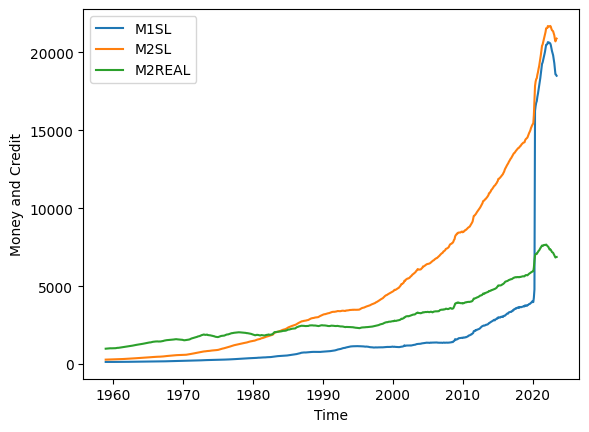

In [105]:
#Group 5 sub-groups Money and Credit

#Sub-Group-1 Money that Banks and Other Financial Institutions have Direct Access to - Group 5
Liquid_cash_vars = ["M1SL","M2SL","M2REAL"]

for i in Liquid_cash_vars:
    plt.plot(data["sasdate"],data[i],label =i)        
plt.legend()
plt.xlabel("Time")
plt.ylabel("Money and Credit")
plt.show()

<h2> Insigts about the Money Supply in the economy </h2>
<ul> 
    <li>M2 is bigger than M1 because M2 comprises all components of M1 as well as supplemental near-money assets not included in M1, such as savings deposits, time-related deposits, and retail money market mutual funds and M2, which includes liquid assets and near-money assets such as savings and money market accounts, increased significantly in 2020, despite the peculiar economic climate produced by the COVID-19 pandemic. This expansion was spurred by a number of variables, including greater disposable income from stimulus payments, fewer spending opportunities, and savings from a shift to remote work. Concurrently, the current economic instability has caused consumers to adopt conservative financial behaviours, preferring to store their money in perceived safe havens such as savings and money market accounts. The Federal Reserve's choice to keep interest rates low amplified this tendency further, as traditional investment vehicles provided lower returns, making the safety and liquidity of these accounts more enticing despite their low yields. </li>
      <li> The dataset highlights significant rises in M1 and M2 during the 2008 financial crisis and the 2020 COVID-19 pandemic. These surges are the result of the Federal Reserve and the federal government working together. In response to these substantial economic shocks, the Federal Reserve implemented measures such as quantitative easing to considerably increase market liquidity, thereby encouraging lending and investment. Concurrently, the federal government implemented key budgetary interventions, with major examples including the 2008 financial sector bailouts and the Trump administration's 2020 CARES Act. Individuals, households, and companies received direct financial assistance. These policies were designed to strengthen the financial system, boost consumer and corporate confidence, and avert prolonged economic downturns.</li>  
    <li>The M2REAL column, representing the money supply adjusted for inflation, displays two pronounced upward surges. The first surge occurs post-2008, aligning with the global financial crisis, and the second, even steeper rise, happens post-2020, coinciding with the COVID-19 pandemic. This data suggests that in response to these major economic challenges, substantial monetary and fiscal interventions were made. Despite inflationary pressures, the real money supply (in terms of purchasing power) has been significantly increased during these periods, highlighting the scale and assertiveness of economic policies implemented in these times of crisis. </li>    
<li>Since departing from the gold standard in the 1970s, the U.S. money supply has grown substantially, facilitated by the flexibility of fiat currency. This growth has been driven by adaptive monetary policies, economic expansion, increased credit availability, government borrowing, and sustained global demand for the U.S. dollar, even amidst inflationary pressures.</li>       
</ul>    

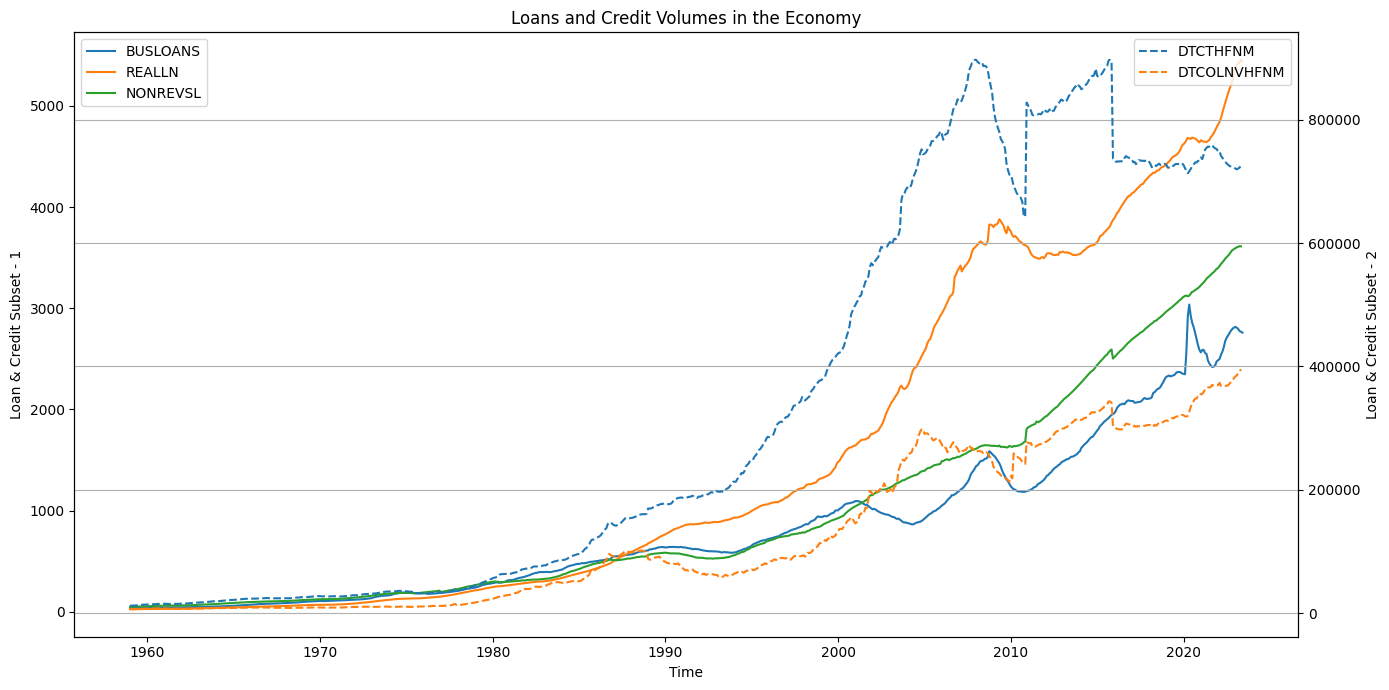

In [22]:
#Subgroup 2 Loans and Credit volumes in the Economy - Group 5

# Splitting the variables into two sets based on their scales
sg1 = ["BUSLOANS", "REALLN", "NONREVSL"]
sg2 = ["DTCTHFNM", "DTCOLNVHFNM"]

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the first set of variables on the primary y-axis
for variable in sg1:
    ax1.plot(data["sasdate"], data[variable], label=variable)
ax1.set_xlabel('Time')
ax1.set_ylabel('Loan & Credit Subset - 1')
ax1.legend(loc='upper left')

# Creating the secondary y-axis for the second set of variables
ax2 = ax1.twinx()
for variable in sg2:
    ax2.plot(data["sasdate"], data[variable], label=variable, linestyle='--')
ax2.set_ylabel('Loan & Credit Subset - 2')
ax2.legend(loc='upper right')

plt.title('Loans and Credit Volumes in the Economy')
plt.grid(True)
plt.tight_layout()
plt.show()


<h2> Insights about Loan and Credit in the Economy </h2>
<ul>
    <li>In contrast to the consistent trajectory of commercial and real estate loans, the sharp increase in consumer loans and leases ("DTCTHFNM") is symptomatic of the consequences of expansionary monetary policy during periods of economic uncertainty. Lower interest rates, implemented to stimulate borrowing and spending, have most certainly increased the appeal of consumer loans. During times of economic uncertainty, this behaviour might lead to increased borrowing for consumption.
</li>
    <li>The constant growth trend of "BUSLOANS" (Commercial and Industrial Loans) demonstrates a balanced approach to business borrowing and lending. While monetary policy influences business borrowing through interest rate changes, the stability demonstrates the importance of company confidence, global economic conditions, and sector-specific factors in driving corporate loan behaviours.</li>
    <li>
    The apparent increase in consumer and motor vehicle loans ("DTCTHFNM" and "DTCOLNVHFNM") reflects the larger role of monetary policy tools in changing consumer behaviour. Expansionary monetary policy, characterised by low interest rates and economic stimulus packages, is intended to increase consumption. The increase in these loans indicates increased economic activity and spending in response to such policy actions.
    </li>


</ul>

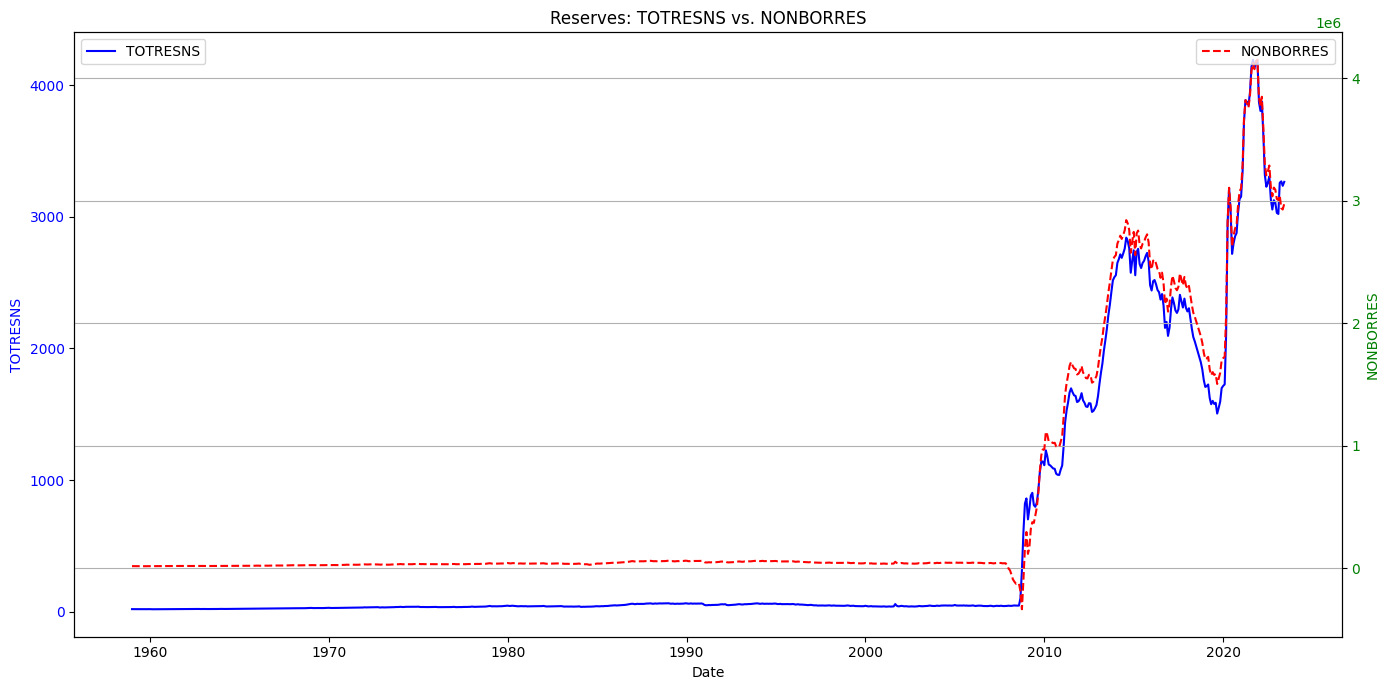

In [24]:
#Subgroup 3 Monetary Base and Reserves - Group 5


Reserves = [data["TOTRESNS"],data["NONBORRES"]]

# Plotting the variables "TOTRESNS" and "NONBORRES" with two different y-axes

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting TOTRESNS on the primary y-axis
ax1.plot(data["sasdate"], Reserves[0], label="TOTRESNS", color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('TOTRESNS', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Creating the secondary y-axis for NONBORRES
ax2 = ax1.twinx()
ax2.plot(data["sasdate"], Reserves[1], label="NONBORRES", color='red', linestyle='--')
ax2.set_ylabel('NONBORRES', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.title('Reserves: TOTRESNS vs. NONBORRES')
plt.grid(True)
plt.tight_layout()
plt.show()


<h2> Insights about Cash Reserves </h2>

<ul> 
    <li>"TOTRESNS" displays significant surges at regular intervals, indicating significant liquidity injections into the banking system. During times of economic uncertainty, such expansions frequently coincide with central banks' expansionary monetary policies, ensuring banks maintain adequate reserves for lending and other commitments.
</li>
    <li>The movement of "NONBORRES" and "TOTRESNS" indicates that a significant amount of the increasing total reserves is not borrowed. This parallel pattern suggests that banks are being cautious, maybe holding reserves rather than issuing loans, as a result of broader economic concerns influencing their actions.</li>
    

</ul>

In [31]:
#Last two sub groups CONSPI and INVEST in the group 5


CONSPI, INVEST = data["CONSPI"], data["INVEST"]
time = data["sasdate"]

fig, axes = plt.subplots(ncols=2, figsize=(16, 6), sharex=True)

# Plotting CONSPI
axes[0].plot(time, CONSPI, label="CONSPI", color='blue')
axes[0].set_title('Consumer Credit to Personal Income (CONSPI)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('CONSPI')
axes[0].legend()
axes[0].grid(True)

# Plotting INVEST
axes[1].plot(time, INVEST, label="INVEST", color='green')
axes[1].set_title('Securities in Bank Credit (INVEST)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('INVEST')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

<h2> Insights about CONSPI and INVEST </h2>
<ul>
    <li>There are significant drops in CONSPI during the 1970s, the 1980s, after 1990, post 2008 and 2020 these can be can be attributed to economic recessions, tighter monetary policies, or global economic challenges during these periods, leading to reduced consumer borrowing relative to income. Conversely, the subsequent rises post these dips often reflect economic recoveries, expansionary monetary policies, and increased consumer confidence, leading to higher borrowing as consumers anticipate better financial prospects. </li>
    <li>  The "INVEST" metric primarily shows an upward trend, indicating a constant increase in bank investments in securities over time. This pattern illustrates banks' rising participation and demand in the securities market, where they may be looking for broader revenue streams and higher returns on investments. The notable interruption, notably the 2020 drop, sticks out. This divergence from the constant development pattern highlights the importance of major economic shocks or uncertainty. The drop could be the result of banks disposing securities to meet immediate liquidity needs, altering their risk profiles in response to market volatility, or both. This temporal reversal of the general trend emphasises the dynamic character of bank investment behaviour in reaction to larger economic situations.
</li>
    </ul>

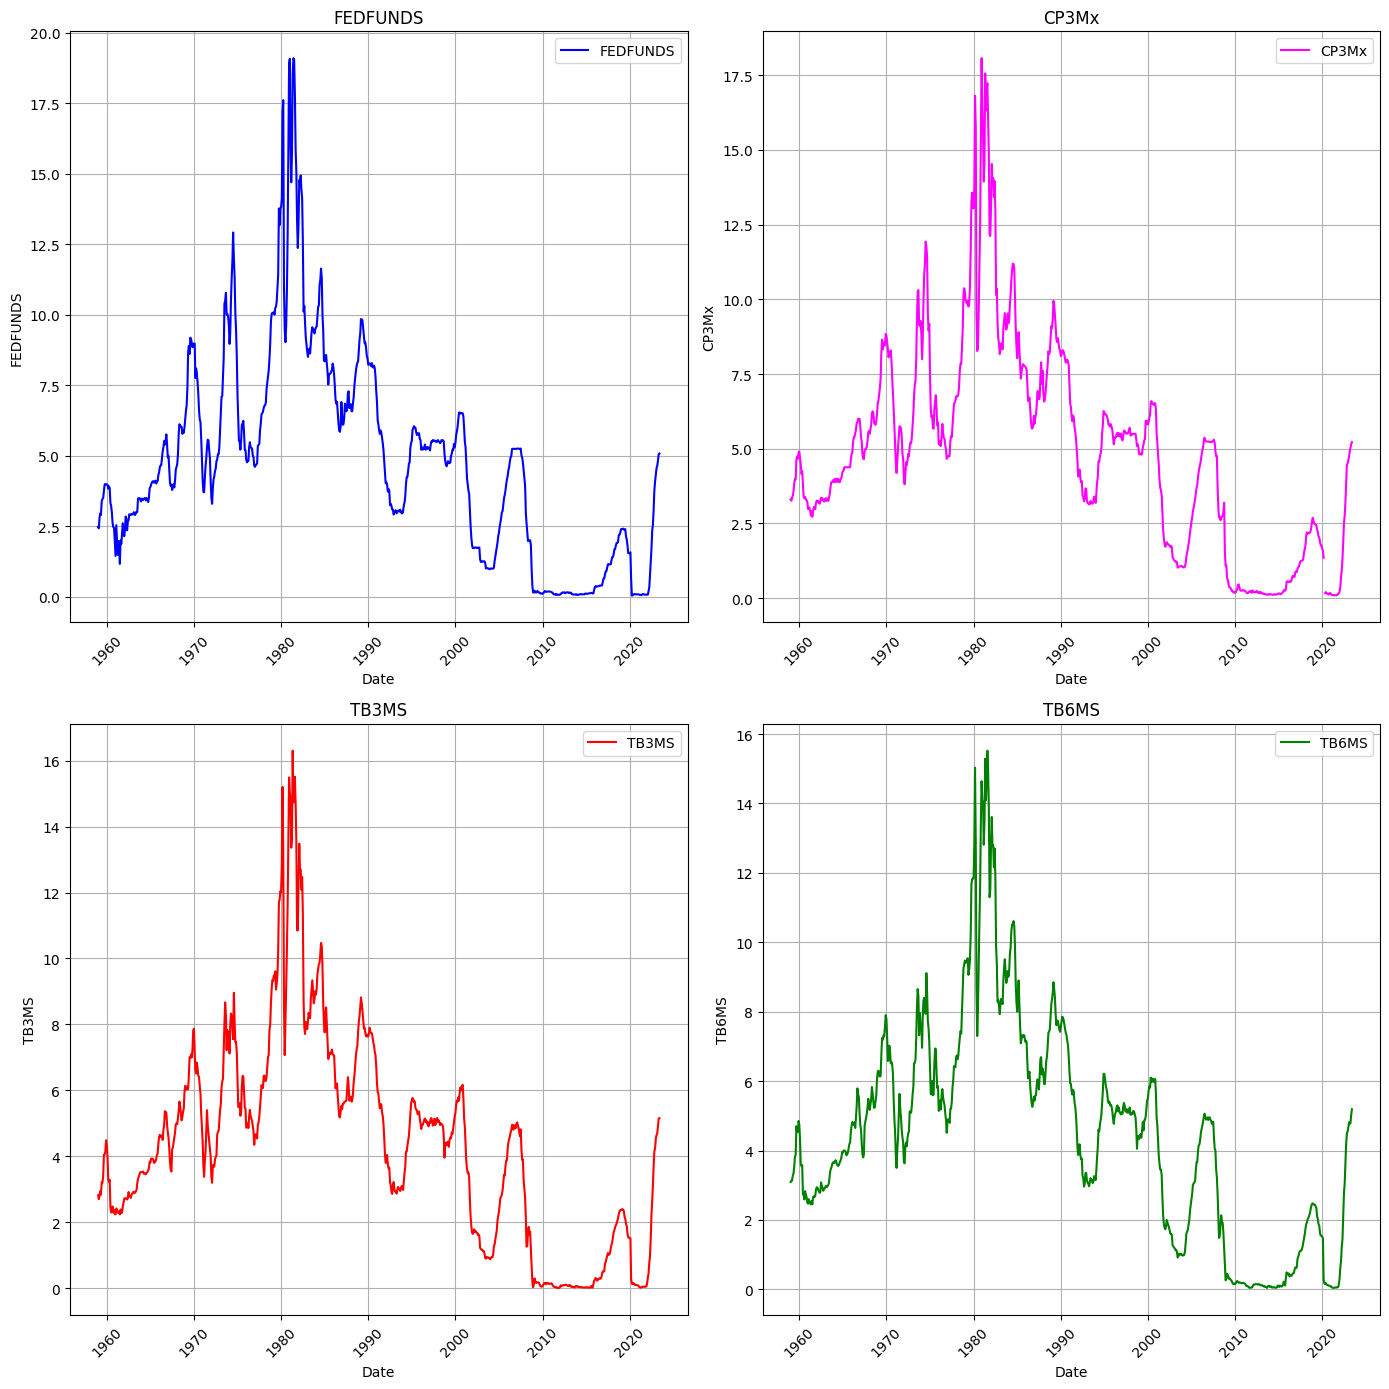

In [48]:
#Group - 6 Interest rate and Exchange Rates Sub Groups

#Rates for Instruments with maturities of less than one year
shrt_rates = ["FEDFUNDS", "CP3Mx", "TB3MS", "TB6MS"]
# Creating a 2x2 grid for the plots with labeled axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
positions = [(0,0), (0,1), (1,0), (1,1)]
for idx, rate in enumerate(shrt_rates):
    row, col = positions[idx]
    axes[row, col].plot(data["sasdate"], data[rate], label=rate, color=colors[idx])
    axes[row, col].legend()
    axes[row, col].grid(True)
    axes[row, col].set_title(rate)
    
    # Setting x and y labels
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel(rate)
    
    # Rotating x-axis labels for better visibility
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<H2> Insights about Short Term Rates </H2>
<ul>
    <li>The Federal Funds Rate, which is the overnight rate at which depository institutions lend reserve balances to other depository institutions, was at its highest in the late 1970s and early 1980s, peaking about 1980. This increase reflects the Federal Reserve's strong tightening to battle the rising inflation of the time. The pattern shows a general drop throughout the decades, implying a more accommodating monetary policy, particularly during the 2008 financial crisis and in recent years.
</li>
    <li>CP3Mx (3-Month Commercial Paper Rate): Representing the interest rate on short-term unsecured corporate loans, CP3Mx closely matches the FEDFUNDS throughout its timeline, implying that central bank rates have a direct impact on prime firms' borrowing costs. The noteworthy peak around 1980 is a strong evidence to the period's heightened inflationary pressures, which made corporate borrowing more expensive. The following reduction, particularly after 2000, highlights a broader trend of lower borrowing rates, which may be caused by global economic developments and more accommodating central bank policies.

</li>
    <li>TB3MS (3-Month Treasury Bill Rate): This rate, which measures short-term returns on US government assets, has largely tracked the FEDFUNDS rate. The high levels around 1980 reflect the larger macroeconomic scenario of dealing with rising inflation. The subsequent progressive fall, with slight oscillations, suggests periods of economic development punctuated by brief recessions or slowdowns. The pattern demonstrates how monetary policy and market risk perceptions have influenced government borrowing costs.
</li>
    <li>TB6MS (6-Month Treasury Bill Interest Rate): TB6MS, a little longer-term view than the 3-Month T-Bill, essentially mirrors the patterns of its shorter-term sibling. The high rates around 1980, followed by a general decline, represent macroeconomic adjustments and policy responses throughout time. This convergence with the 3-Month rate reflects consistent market expectations throughout the short term, emphasising the importance of macroeconomic and policy factors in setting interest rates.
</li>
    </ul>

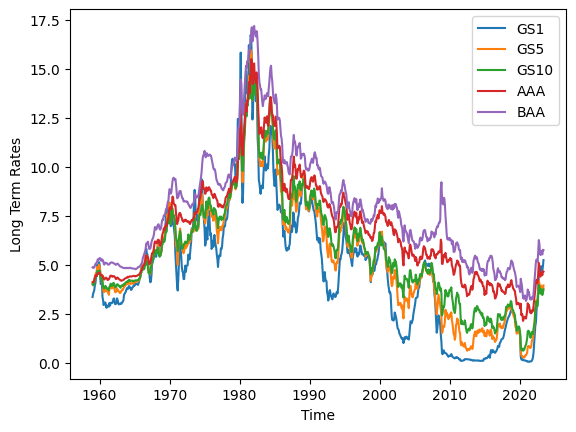

In [106]:
#SubGroup -2 Long-Term Rates - Group 6 Interest rate and Exchange Rates


lt_rates = ["GS1", "GS5", "GS10", "AAA", "BAA"]

for i in lt_rates:
    plt.plot(data["sasdate"],data[i],label =i)        
plt.legend()
plt.xlabel("Time")
plt.ylabel("Long Term Rates")
plt.show()

<h2>Insights about Long Term Rates </h2>
<ul>
    <li>The 1-Year Treasury Rate is usually the lowest of the bunch. The trend, particularly the considerable jump around 1980, illustrates the Federal Reserve's tough monetary policy stance to combat excessive inflation during that time period. Following that period, the rate has generally declined, in keeping with a globally dropping interest rate environment and more accommodating central bank policies.
</li>
    <li>The 5-Year and 10-Year Treasury Rates, which are indicators of medium- to long-term economic prospects, likewise peaked in the 1980s. Their subsequent drop over time, with the 10-year often higher than the 5-year, indicates a flattening yield curve at times, implying market predictions of weaker future economic growth or lower inflation.
</li>
    <li>AAA: While the yield on top-tier corporate bonds is lower than that on riskier bonds, it is often greater than that on government securities. This spread is the market's compensation for even the most minor company credit risk. The trend, notably the relative consistency in recent decades, demonstrates investor trust in these highly rated corporate organisations in the face of changing economic conditions.
</li>
    <li>BAA: The BAA corporate bond yield, which is the highest in the group, has been volatile over the years. The high levels, particularly amid economic downturns or uncertainty, highlight the market's risk assessment. The spread between AAA and BAA yields can be a good indicator of market sentiment towards credit risk, with wider spreads indicating increased credit concerns.
</li>
    <li>The observed hierarchy, with GS1 at the bottom and BAA at the top, followed by AAA, GS10, and GS5, exemplifies the risk-return trade-off in the financial industry. Government securities such as GS1, GS5, and GS10, which are nearly risk-free, give lower yields than corporate bonds. AAA-rated corporate bonds, which are the most creditworthy, offer lower yields than BAA-rated bonds, which have a moderate credit risk. This sequence emphasises how investors demand larger returns in exchange for taking on additional risk, whether from extending the investment horizon or from prospective credit disasters.
</li>
 </ul>   

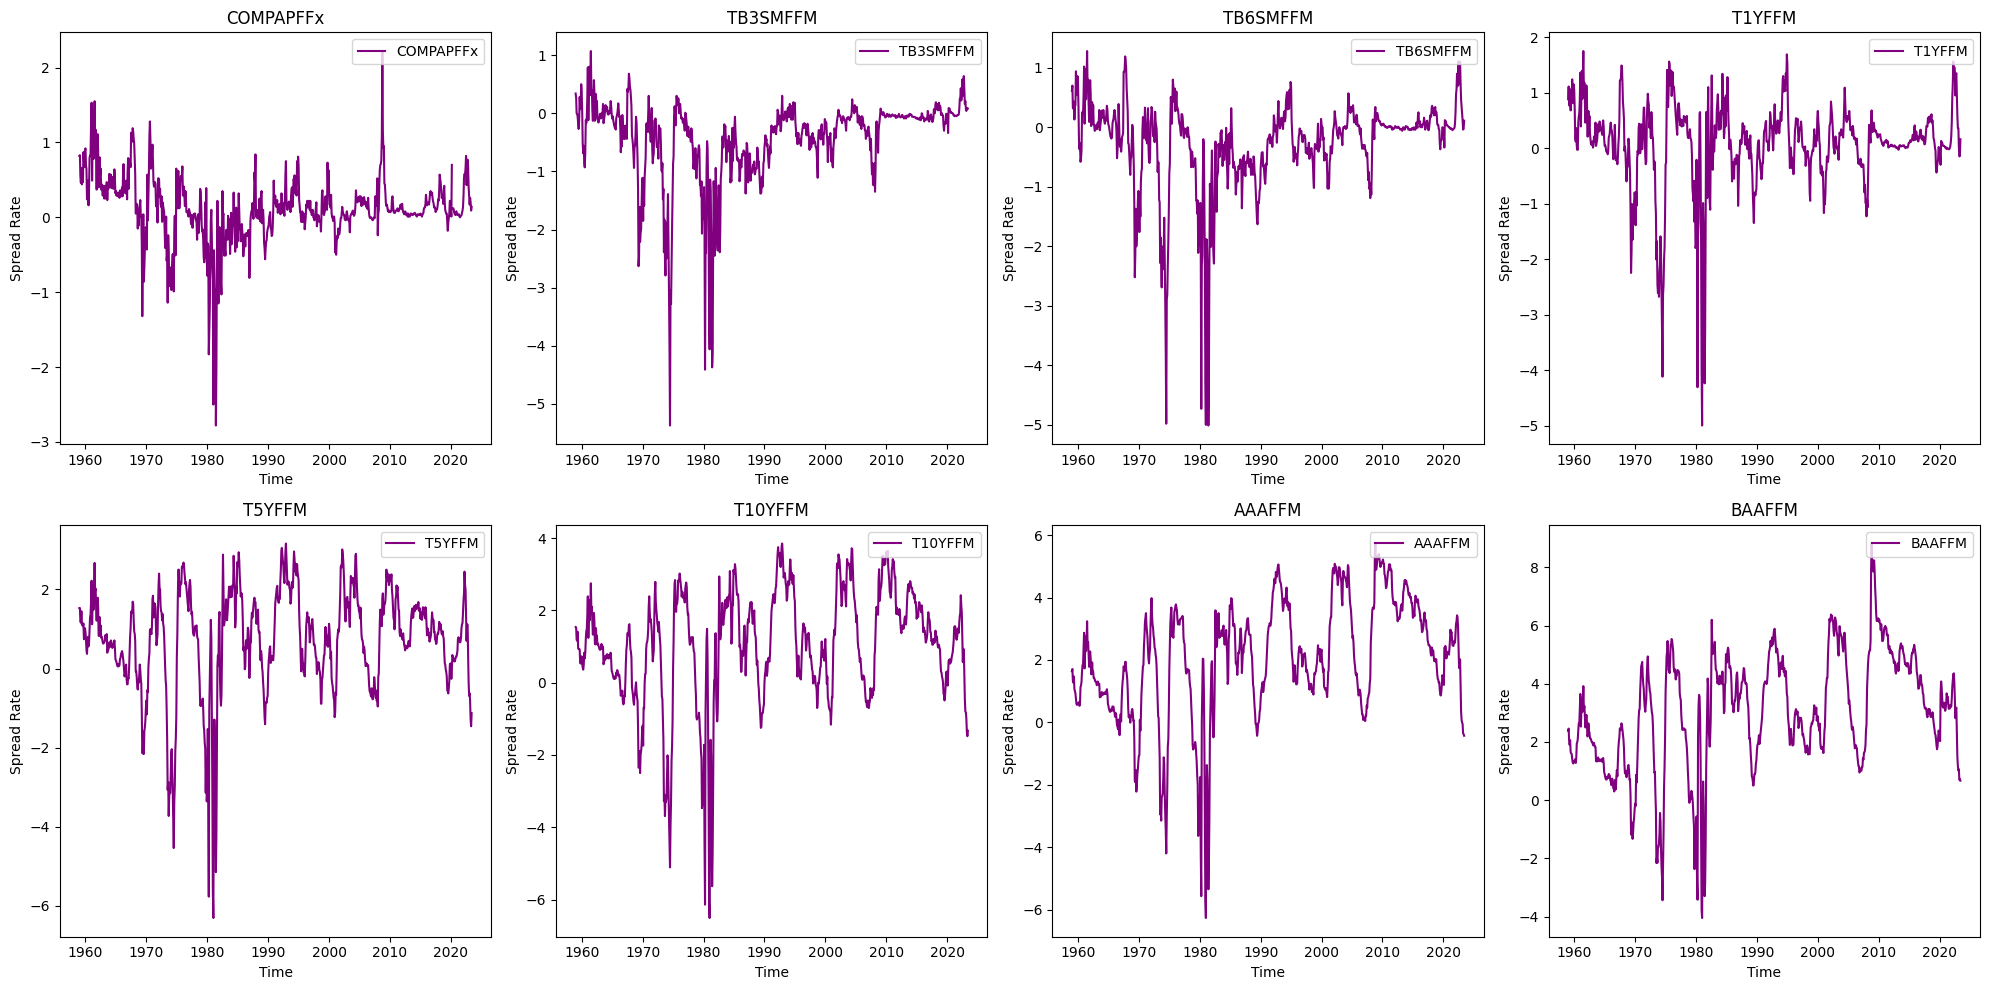

In [54]:
#SubGroup -3 Rate Spreads Against the Federal Funds Rate - Group 6 Interest rate and Exchange Rates

rate_spreads = ["COMPAPFFx", "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM"]
# Plotting the graphs in a 2x4 grid for the rate spreads

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for ax, rate in zip(axes.flatten(), rate_spreads):
    ax.plot(data["sasdate"], data[rate], label=rate, color="purple")
    ax.set_title(rate)
    ax.set_xlabel('Time')
    ax.set_ylabel('Spread Rate')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

<H2>Insights about Interest Rate Spreads </H2>

<ul> 
    <li>Over the years, I've noticed that these spreads are sensitive to changes in monetary policy. When the central bank tightens policy, causing the Federal Funds Rate to rise, spreads frequently widen briefly before narrowing as markets digest the policy implications. During accommodating stances, on the other hand, spreads tend to fall, reflecting the policy's expected effectiveness in boosting economic development and reducing credit risks.
</li>
    <li>It's interesting to note that during times of economic stress, the spreads between riskier assets (such as corporate bonds) and risk-free assets (such as Treasuries) frequently expand, reflecting a heightened perception of credit risk. For example, the spread on BAA bonds, which represent modest credit risk, expands dramatically during these periods, suggesting market concerns about probable defaults.
</li>
    <li>Following large economic shocks, I've seen these spreads narrow as economic conditions stabilise. This trend highlights the market's regained confidence as well as the efficiency of monetary policy interventions, in which central banks frequently adopt accommodative postures in order to pump liquidity and stabilise the financial system.
</li>
    

</ul>

In [56]:
#SubGroup -4 Foreign Exchange Rates - Group 6 Interest rate and Exchange Rates

fx_rates = ["EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for ax, rate in zip(axes.flatten(), fx_rates):
    ax.plot(data["sasdate"], data[rate], label=rate, color="orange")
    ax.set_title(rate)
    ax.set_xlabel('Time')
    ax.set_ylabel('Fx Rate')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

<H2>Insights about Fx Rates </H2>
<ul>
    <li>I've noticed that the USD has moments of strength and weakness against major currencies over the years. These swings frequently correspond to worldwide economic movements, with the USD acting as a safe-haven currency during times of increased global uncertainty, resulting in its gain.
</li>
    <li>Notably, when the United States tightens monetary policy or boosts interest rates, the USD tends to strengthen against other currencies. This represents international capital being drawn to the United States due to higher yields, boosting demand for the dollar.
</li>    
    <li>Trade dynamics, geopolitical events, and commodity prices can all have an impact on the USD's exchange rate with currencies such as the Canadian dollar (EXCAUSx) and the Japanese yen (EXJPUSx). Oil price movements, for example, have an impact on the Canadian dollar, resulting in changes in the USD-CAD exchange rate.
</li>    
    <li>Sharp increases or decreases in certain foreign exchange rates at specific intervals reflect external economic shocks or substantial policy changes in the respective countries. For example, economic or political uncertainty in the United Kingdom, such as Brexit, would cause erratic swings in the EXUSUKx (USD/UK pound rate).
</li>    
    
    
</ul>    

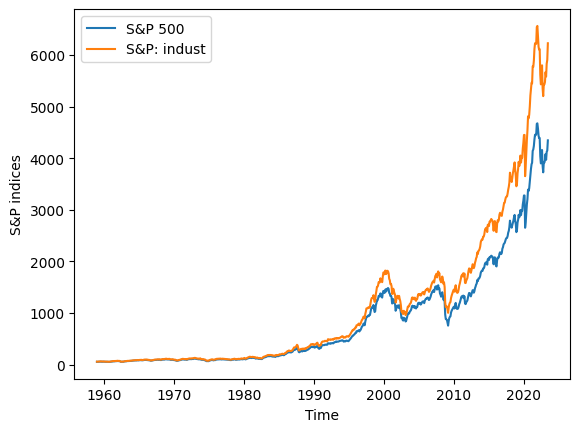

In [107]:
#Group 8 - Sub groups : Stock Market

#Sub Group - 1 Market Indices

indices = ["S&P 500","S&P: indust"]

for i in indices:
    plt.plot(data["sasdate"],data[i],label =i)        
plt.legend()    
plt.xlabel("Time")
plt.ylabel("S&P indices")
plt.show()

<H2> Insights about the Indices </H2>

<ul>
<li>Both the S&P 500 and the S&P: Industrials have shown a general increasing trend in the long run. This shows that investors have a positive, or bullish, outlook on the US economy. Despite short-term obstacles or cyclical downturns, the prevalent attitude appears to be that the economy's and corporate America's core strengths will fuel growth over time. The consistent rising trend could also be an example of the rule of big numbers, which states that over long periods of time, market returns tend to drift towards a long-term average, ensuring growth.
</li>
<li>Surprisingly, the S&P Industrials frequently outperforms the larger S&P 500. This, in my opinion, could be attributable to the cyclical character of the industrial sector, with industries frequently leading economic expansions and benefiting from faster growth during boom periods. Because industries play a critical role in production, exports, and capital spending, their success can be a reflection of both domestic and global economic health. Their significantly larger values could suggest instances when the industrial sector outperforms the overall market in terms of growth, possibly due to increasing production, infrastructure projects, or other sector-specific tailwinds.
</li>




</ul>


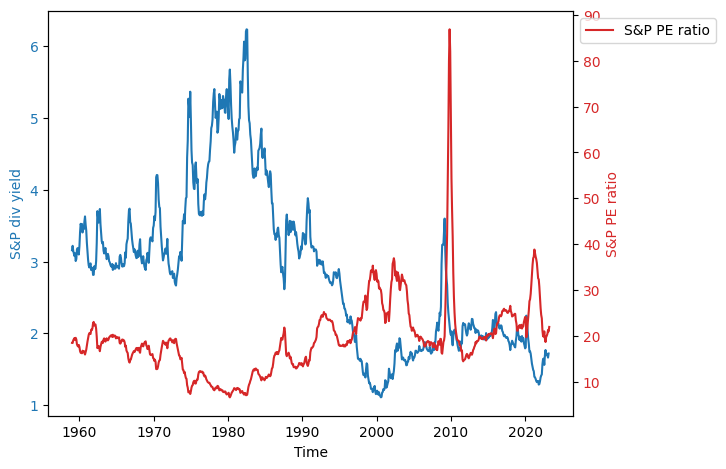

In [64]:
#Sub Group -2 Metrics for Market Valuation

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('S&P div yield', color=color)
ax1.plot(data["sasdate"], data["S&P div yield"], color=color, label="S&P div yield")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('S&P PE ratio', color=color)
ax2.plot(data["sasdate"], data["S&P PE ratio"], color=color, label="S&P PE ratio")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


<H2>Insights about Metrics for Market Valuation </H2>

<ul>
    <li>The substantial rises in the Price-to-Earnings (P/E) ratio between 2010 and 2020 are due to a combination of macroeconomic and investor behaviour factors. Following the 2008 financial crisis, expectations of strong future earnings and central banks' accommodative policies inundated markets with liquidity, fueling a demand for shares, particularly in a recovering economy. In 2020, a rise in individual investors, fueled by stimulus checks and digital trading platforms, combined with institutional interest in areas resistant to pandemic disruptions, drove up stock prices. These trends, together with near-zero global interest rates, strengthened the attraction of equities as a high-return asset, explaining the observed rising P/E levels.
</li>
    <li>The Price-to-Earnings (P/E) ratio increased significantly between 2010 and 2020, reflecting a combination of macroeconomic trends and changing investor preferences. The post-2008 financial landscape was characterised by optimism for good future earnings and liquidity injections from central banks, which heightened the appeal of equities. By 2020, the stock market had seen a spike in retail participation, fueled by stimulus funds and the convenience of online trading platforms, while institutional investors focused on industries with pandemic resistance. Concurrently, the near-zero global interest rate environment has further entrenched equities as a preferred conduit for possible returns, explaining the continued rise in P/E levels.
</li>
    
</ul>    

<h2>Autocorrelation Plots</h2>

<p> I have used the same lags of 12 to 120 to look at 1 to 10 year period, the reasoninig for all them will mentioned at the end of the ACF analysis portion, i;ve done so in the interest of saving time and repeating it again and again</p>

<Figure size 1400x600 with 0 Axes>

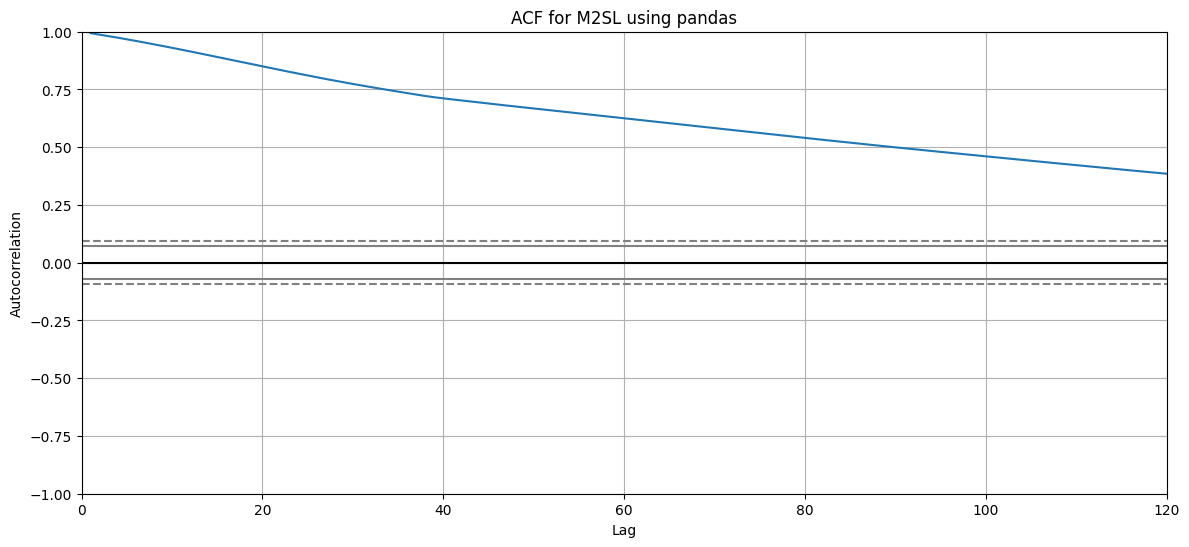

In [77]:
# For M2SL using statsmodels
plt.figure(figsize=(14,6))
plot_acf(data["M2SL"].dropna(), lags=120, title="ACF for M2SL using statsmodels")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

# Using pandas
plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(data["M2SL"].dropna())
plt.title("ACF for M2SL using pandas")
plt.xlim(0, 120)
plt.show()


<ul>
<li>M2SL's autocorrelation function begins with a strong positive value and gradually decays as the lag rises. This indicates that the series has a strong trend component.</li>

<li>Even with longer lags, the autocorrelation remains considerable, demonstrating that the present value of M2SL can be influenced by values from several months earlier.</li>
    
</ul>    

<Figure size 1400x600 with 0 Axes>

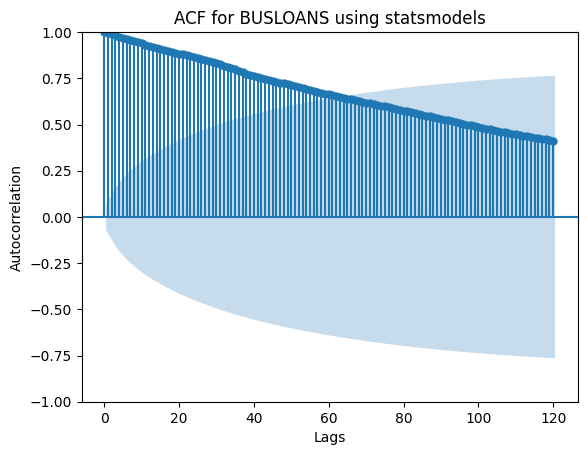

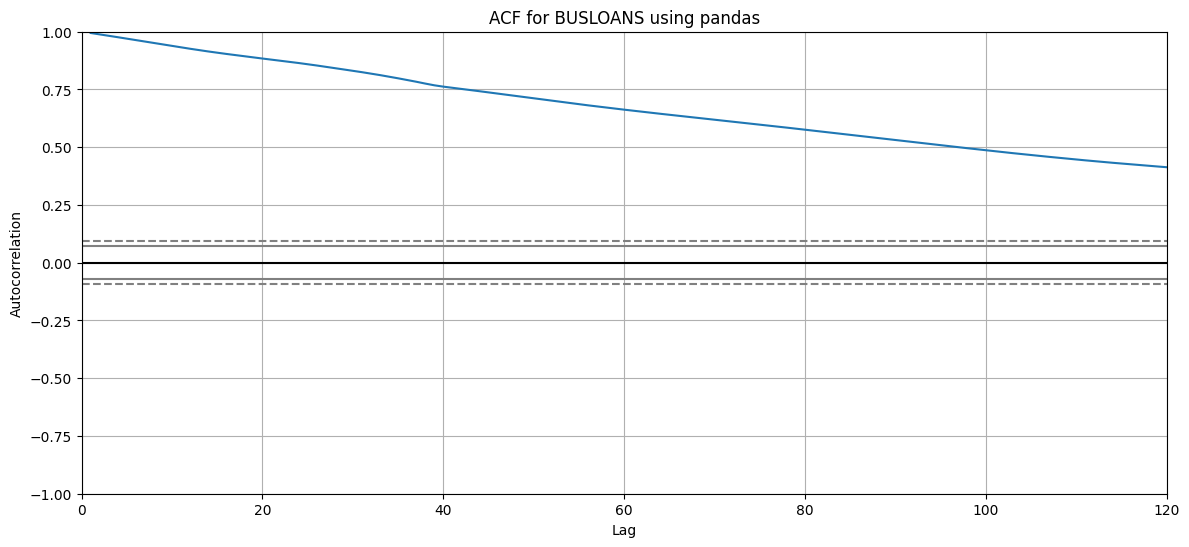

In [78]:
# For BUSLOANS using statsmodels
plt.figure(figsize=(14,6))
plot_acf(data["BUSLOANS"].dropna(), lags=120, title="ACF for BUSLOANS using statsmodels")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

# Using pandas
plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(data["BUSLOANS"].dropna())
plt.title("ACF for BUSLOANS using pandas")
plt.xlim(0, 120)
plt.show()


<ul>
<li>BUSLOANS' autocorrelation function also begins with a high positive value, indicating a noticeable trend or systematic pattern in the series.</li>
    
<li>The declining character of the autocorrelation function, as seen in the statsmodels graphic, implies that the influence of previous values decreases as the lag rises.</li>
    
<li>The persistence of considerable autocorrelation over many delays implies that business loan data is influenced by its historical values, meaning that past lending behaviours may continue to influence current lending trends.</li> 
    
</ul>    

<Figure size 1400x600 with 0 Axes>

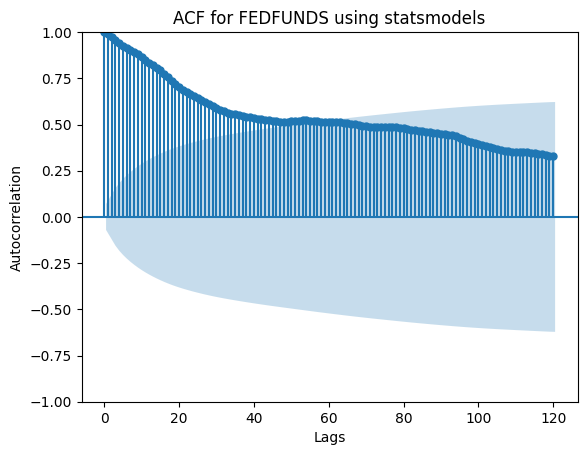

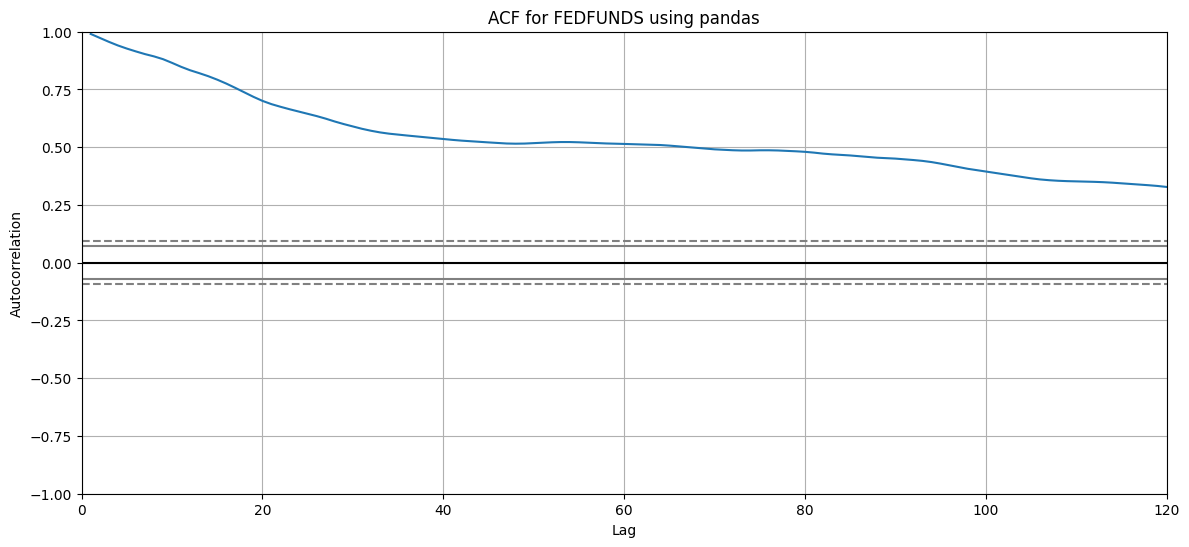

In [79]:
# For FEDFUNDS using statsmodels
plt.figure(figsize=(14,6))
plot_acf(data["FEDFUNDS"].dropna(), lags=120, title="ACF for FEDFUNDS using statsmodels")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

# Using pandas
plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(data["FEDFUNDS"].dropna())
plt.title("ACF for FEDFUNDS using pandas")
plt.xlim(0, 120)
plt.show()


<ul>
<li>FEDFUNDS, which stands for the Effective Federal Funds Rate, exhibits considerable autocorrelations at a variety of lags. The series' steady deterioration shows a substantial trend component. </li>
<li> The observed positive autocorrelation across many delays implies that the federal funds rate is frequently influenced by its prior levels, demonstrating the path-dependent character of monetary policy actions.</li>
<li>The persistence of the autocorrelation shows that previous monetary policy attitudes have long-term consequences for current and future policy directions. </li>


</ul>

<Figure size 1400x600 with 0 Axes>

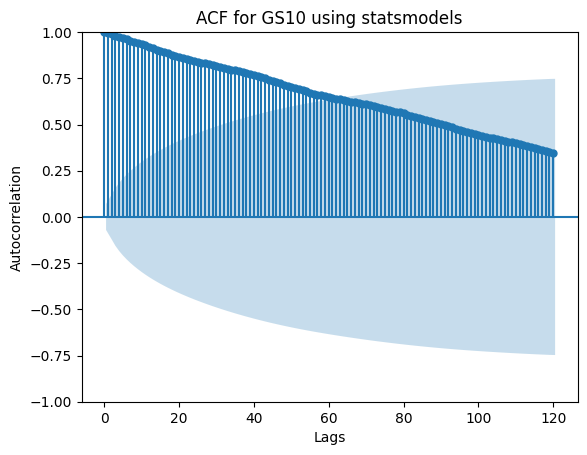

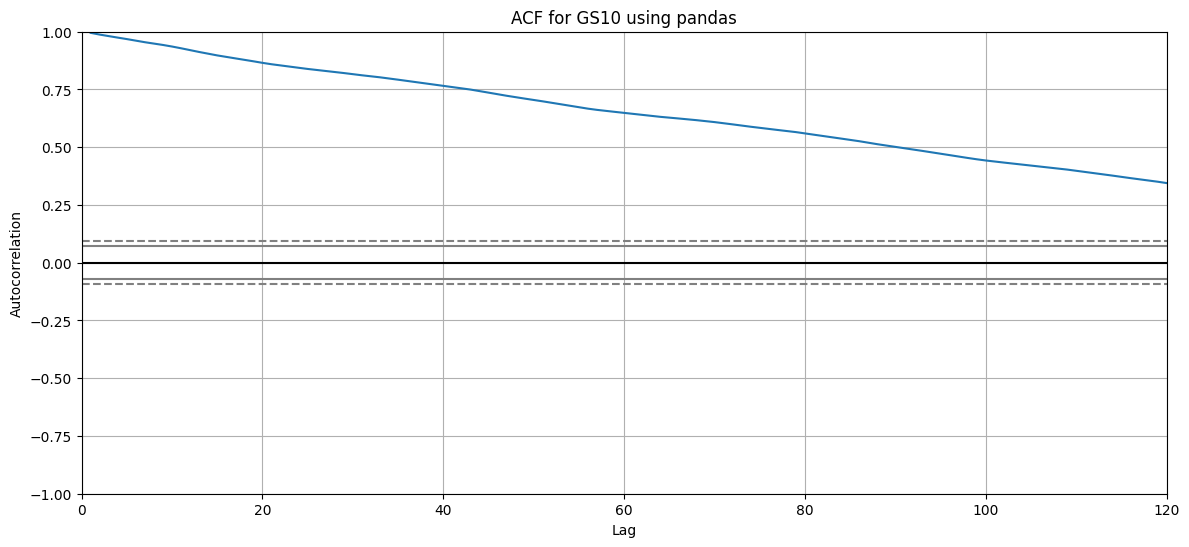

In [80]:
# For GS10 using statsmodels
plt.figure(figsize=(14,6))
plot_acf(data["GS10"].dropna(), lags=120, title="ACF for GS10 using statsmodels")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()
# Using pandas
plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(data["GS10"].dropna())
plt.title("ACF for GS10 using pandas")
plt.xlim(0, 120)
plt.show()


<ul>
<li>The 10-Year Treasury Rate, denoted by GS10, exhibits significant autocorrelation, particularly in the beginning delays. This suggests that the series has a strong trend and may be seasonal. </li>
<li> The slow decay of the autocorrelation function implies that the 10-year treasury rate is influenced by its historical values, indicating that long-term government bond yields are path-dependent.</li>
<li>The high autocorrelation over a range of lags suggests that broader economic conditions, fiscal policies, and global financial market emotions have long-term effects on the 10-year treasury rate's trajectory. </li>


</ul>

<Figure size 1400x600 with 0 Axes>

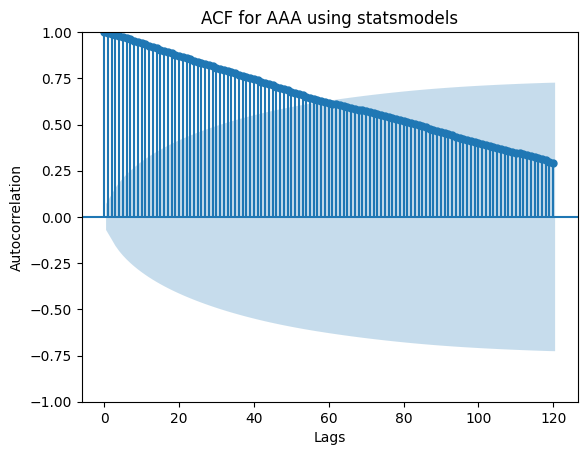

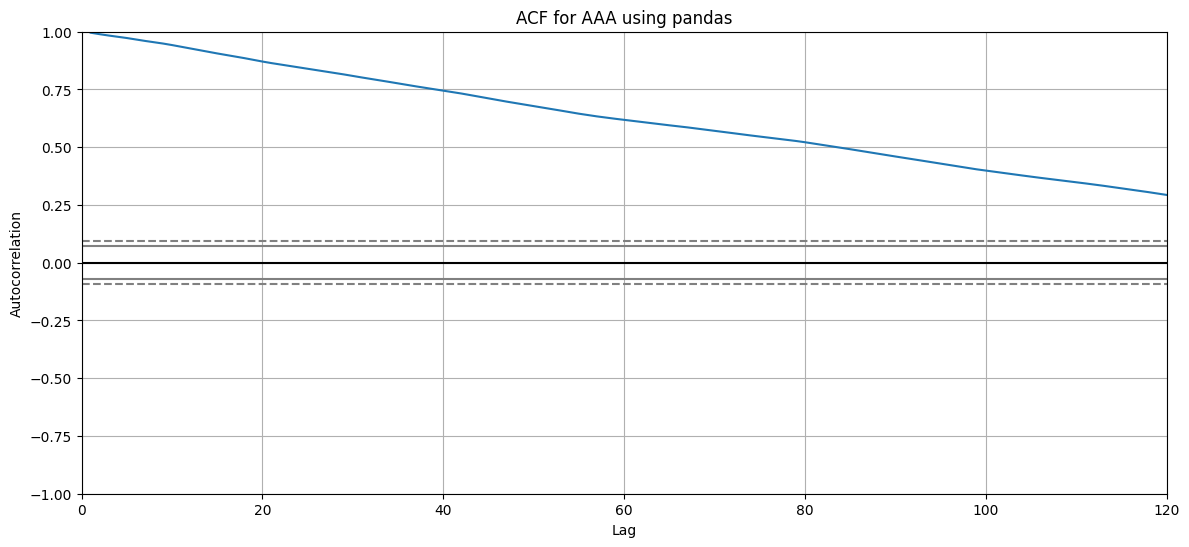

In [81]:
# For AAA using statsmodels
plt.figure(figsize=(14,6))
plot_acf(data["AAA"].dropna(), lags=120, title="ACF for AAA using statsmodels")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

# Using pandas
plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(data["AAA"].dropna())
plt.title("ACF for AAA using pandas")
plt.xlim(0, 120)
plt.show()


<ul>
<li>The AAA variable, which represents Moody's Seasoned Aaa Corporate Bond Yield, begins with a strong positive autocorrelation, indicating that the series is trending. </li>
<li> The slow and continuous degradation of the autocorrelation function over several delays suggests that bond yields are influenced by their past values. This is due to the path dependence inherent in bond market pricing and long-term credit risk assessments.</li>
<li>The occurrence of considerable autocorrelation for an extended period of time shows that the broader economic climate, business creditworthiness, and global financial conditions have long-term effects on AAA bond yields. </li>


</ul>

<Figure size 1400x600 with 0 Axes>

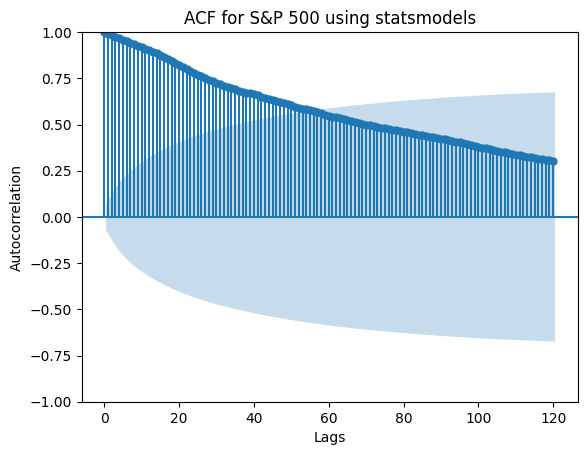

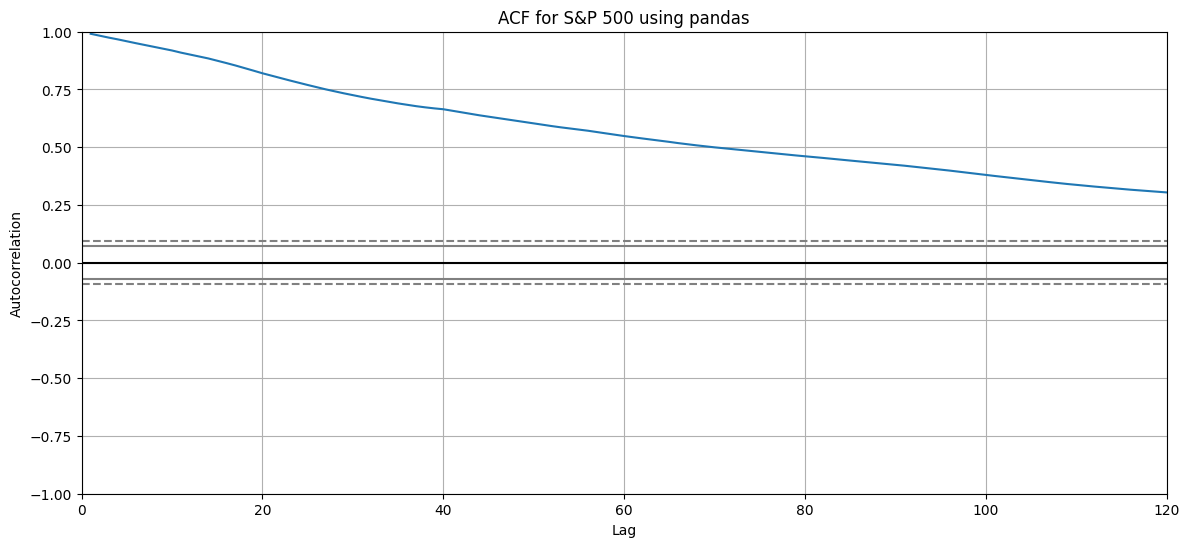

In [82]:
# For S&P 500 using statsmodels
plt.figure(figsize=(14,6))
plot_acf(data["S&P 500"].dropna(), lags=120, title="ACF for S&P 500 using statsmodels")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()
# Using pandas
plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(data["S&P 500"].dropna())
plt.title("ACF for S&P 500 using pandas")
plt.xlim(0, 120)
plt.show()


<ul>
<li>The S&amp;P 500 index, a wide representation of the US stock market, exhibits a substantial positive autocorrelation, especially in the beginning lags, indicating a strong trend in the series. </li>
<li> The persistence of autocorrelation over several lags implies that stock market performance is influenced by historical trends, indicating the momentum-driven nature of equities markets.</li>
<li>The persistence of autocorrelation over several lags implies that stock market performance is influenced by historical trends, indicating the momentum-driven nature of equities markets. </li>


</ul>

<h3>How many lags did you use and why?</h3>
<p>I employed between 12 to 120 lags for autocorrelation analyses of the selected variables. The rationale behind this choice is multi-faceted:</p>
<ol>
    <li><strong>Temporal Resolution of the Data</strong>: Given that the dataset consists of monthly observations, a lag of 12 essentially captures a full year's worth of data, allowing us to understand annual seasonality or cyclical patterns which might be present.</li>
    <li><strong>Duration of Economic Cycles</strong>: Economic cycles, such as business or financial cycles, often span several years. By considering up to 120 lags (equivalent to 10 years of data), we can account for longer-term economic shifts and trends which might be influencing the selected variables.</li>
    <li><strong>Empirical Justification</strong>: In time series analyses, especially for economic data, it's common to examine a year's worth of lags (12 in the case of monthly data) to discern annual patterns. Extending this to 10 years (or 120 lags) ensures we encompass broader economic phenomena that might have lingering effects over a decade.</li>
    <li><strong>Practical Consideration</strong>: Analyzing beyond 120 lags might introduce unnecessary complexity and noise, reducing the interpretability and actionable insights derived from the autocorrelation function.</li>
</ol>
<p>This range, therefore, provides a balanced view, capturing both short-term fluctuations and longer-term trends in the data.</p>


<h2>  Group 5 (Money and Credit) with Group 8 (Stock Market) Correlation </h2>

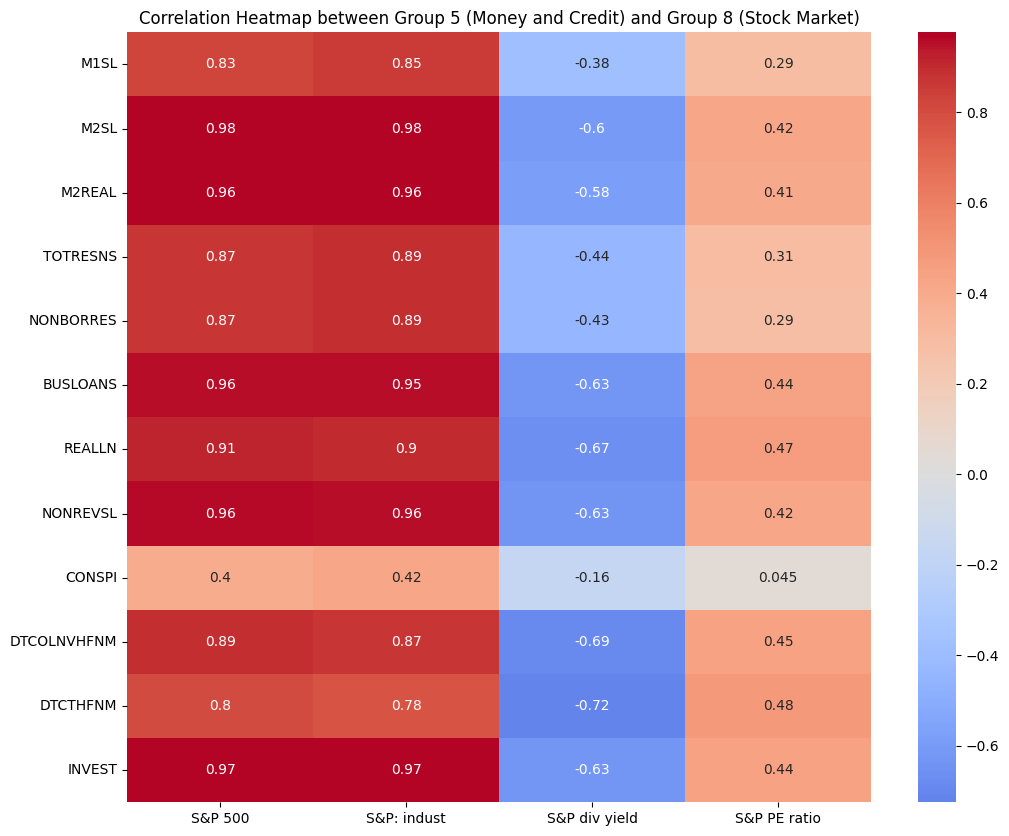

In [92]:
# Define the variables from Group 5 and Group 8
group_5_variables = ["M1SL","M2SL","M2REAL","TOTRESNS","NONBORRES","BUSLOANS","REALLN","NONREVSL","CONSPI","DTCOLNVHFNM","DTCTHFNM","INVEST"]
group_8_variables = ["S&P 500", "S&P: indust", "S&P div yield", "S&P PE ratio"]

# Extract the relevant columns for correlation analysis
correlation_data = data[group_5_variables + group_8_variables].dropna()

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Extract correlations between Group 5 and Group 8 variables
correlation_subset = correlation_matrix.loc[group_5_variables, group_8_variables]

# Plotting the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap between Group 5 (Money and Credit) and Group 8 (Stock Market)")
plt.show()


<h3>Correlation Analysis between Group 5 (Money and Credit) and Group 8 (Stock Market)</h3>

<ul>
    <li><b>Positive Correlations</b>: Many of the monetary and credit variables show a positive correlation with the stock market indices ("S&P 500" and "S&P: indust"). This indicates that as the volume of money and credit in the economy expands, stock market indices tend to rise.</li>
    <li><b>Negative Correlations with Dividend Yield</b>: There's a noticeable negative correlation between most of Group 5's metrics and the "S&P div yield." This suggests that as the monetary and credit indicators increase, the dividend yield tends to decrease. This can be because rising money and credit often lead to a bullish stock market, pushing stock prices up and, in turn, reducing the dividend yield (as yield is inversely proportional to price).</li>
    <li><b>Varied Correlations with P/E Ratio</b>: The correlations with the "S&P PE ratio" are mixed. Some monetary indicators like "M1SL" and "M2SL" have a positive relationship, suggesting that as money supply grows, stock valuations (as measured by P/E) also tend to rise. In contrast, other metrics like "NONREVSL" (non-revolving credit) show a negative correlation, implying that as credit grows, the P/E ratio might see a decrease.</li>
</ul>


<ol>
    <li><b>Monetary Policy and Stock Market</b>: The correlations underscore the interconnectedness between monetary conditions (like money supply) and stock market performance. An expansive monetary policy, reflected by rising money supply metrics, can buoy the stock market.</li>
    <li><b>Credit's Role in Stock Valuations</b>: The mixed correlations with P/E ratios hint at the nuanced role of credit in influencing stock valuations. While an expanding credit environment can boost economic activity and corporate earnings, it might also raise concerns about over-leveraging and future financial stability, potentially impacting stock valuations.</li>
    <li><b>Dividend Yields as a Contrarian Indicator</b>: The negative correlations with dividend yields suggest that when the economy is flush with money and credit, stock prices rise, leading to diminished yields. Historically, very low dividend yields have sometimes been seen as indicators of overvalued markets.</li>
</ol>

<p>Overall, understanding these correlations provides a holistic view of how monetary and credit conditions can influence stock market dynamics, aiding in informed investment and policy decisions.</p>


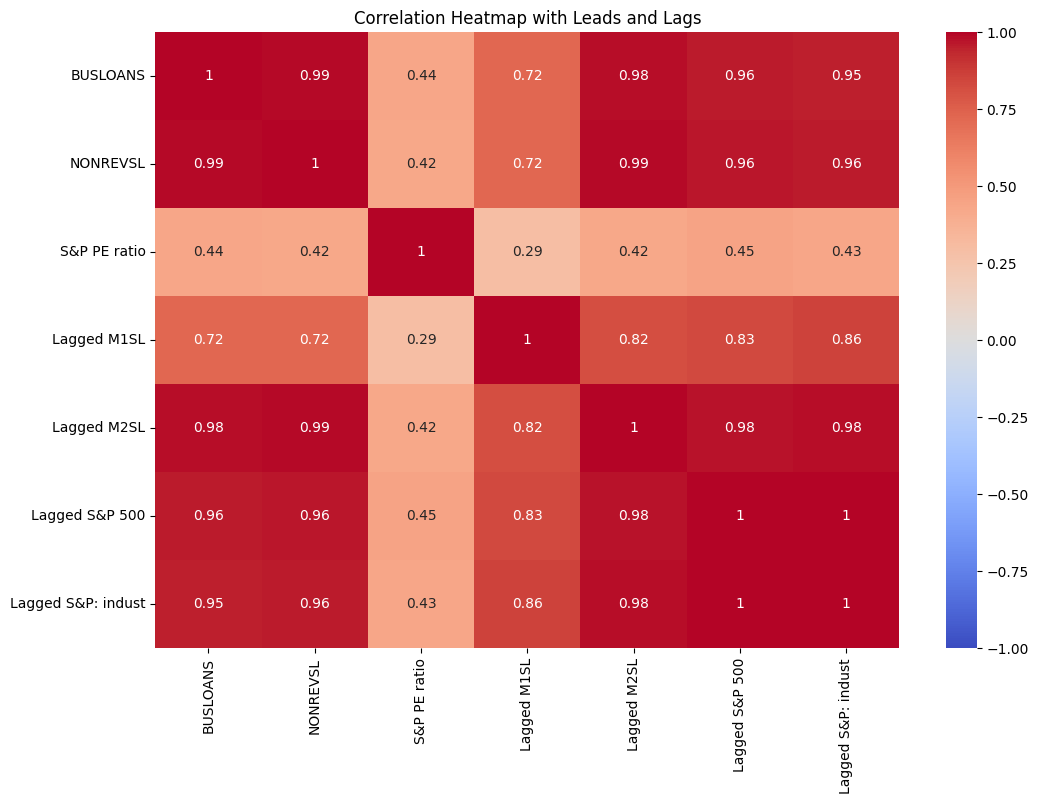

In [97]:
g58 = data[["S&P 500", "S&P: indust", "M1SL", "M2SL", "BUSLOANS", "NONREVSL", "S&P PE ratio"]].copy()

# Now, you can apply the rest of your operations without any warnings.
g58["Lagged M1SL"] = g58["M1SL"].shift(2)
g58["Lagged M2SL"] = g58["M2SL"].shift(2)
g58["Lagged S&P 500"] = g58["S&P 500"].shift(2)
g58["Lagged S&P: indust"] = g58["S&P: indust"].shift(2)

# Dropping the original columns for lagged variables to avoid duplicate correlation
g58 = g58.drop(columns=["M1SL", "M2SL", "S&P 500", "S&P: indust"])

# Calculating the correlation matrix
correlation_matrix = g58.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Leads and Lags')
plt.show()


<ol>
    <li><b>Lagged Money Supply and Stock Market Indices</b>: The lagged versions of M1SL and M2SL show moderate positive correlations with the S&P PE ratio, indicating that past changes in money supply might influence stock valuations in subsequent periods.</li>
    <li><b>Lagged Stock Market Indices and Credit Metrics</b>: There's a visible correlation between lagged S&P 500 and BUSLOANS. A thriving stock market might encourage borrowing and business loans in the subsequent months, hinting at the feedback loop between stock performance and credit conditions.</li>
    <li><b>P/E Ratio and Business Loans</b>: There's a moderate negative correlation between the S&P PE ratio and BUSLOANS. This could indicate that when businesses are borrowing more, the market may be less willing to pay a premium for earnings, possibly because of concerns over increasing corporate debt levels.</li>
    <li><b>Non-revolving Loans and Stock Industrials</b>: The S&P: indust index has a positive correlation with NONREVSL, suggesting that industrial companies might be the ones leveraging non-revolving credit facilities.</li>
</ol>
<p>Overall, these correlations provide insights into the intricate interplay between the stock market, money supply, and credit. When interpreting these relationships, it's crucial to remember that correlation doesn't imply causation, and other macroeconomic factors could be influencing these observed patterns.</p>


<H2>Group 6 (Interest and exchange rates) with Group 8 (Stock Market) Correlation <h2>

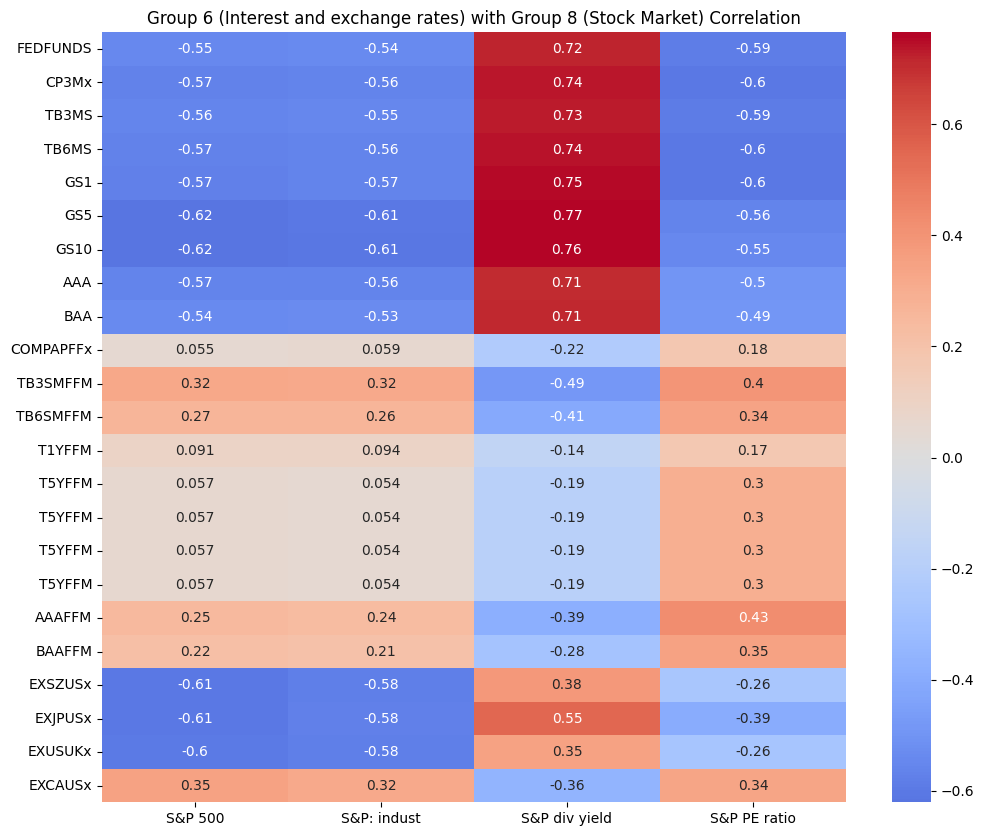

In [99]:
# Define the variables from Group 6 and Group 8
group_6_variables = ["FEDFUNDS","CP3Mx","TB3MS","TB6MS","GS1","GS5","GS10","AAA","BAA","COMPAPFFx","TB3SMFFM","TB6SMFFM","T1YFFM","T5YFFM","T5YFFM","AAAFFM","BAAFFM","EXSZUSx","EXJPUSx","EXUSUKx","EXCAUSx"]
group_8_variables = ["S&P 500", "S&P: indust", "S&P div yield", "S&P PE ratio"]

# Extract the relevant columns for correlation analysis
correlation_data = data[group_6_variables + group_8_variables].dropna()

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Extract correlations between Group 5 and Group 8 variables
correlation_subset = correlation_matrix.loc[group_6_variables, group_8_variables]

# Plotting the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', center=0)
plt.title("Group 6 (Interest and exchange rates) with Group 8 (Stock Market) Correlation")
plt.show()


<h3>Correlation Analysis between Group 6 (Interest and exchange rates) and Group 8 (Stock Market) Correlation</h3>

 <ol>
        <li><strong>Interest Rates and Stock Market</strong>: 
            <p>The Federal Funds rate (FEDFUNDS), which is a key interest rate, exhibits a negative correlation with the stock market indices (S&P 500 and S&P: indust). This is in line with traditional economic understanding: when interest rates rise, borrowing becomes more expensive, potentially slowing down investment and consumption, and this can be a drag on stock market performance.</p>
        </li>
        <li><strong>Credit Ratings and Stock Market</strong>:
            <p>The AAA and BAA credit ratings, which reflect the average yield on bonds rated AAA and BAA, show negative correlations with the stock market indices. This suggests that as the yield (or interest) on these bonds increases, the stock market tends to underperform. This makes sense as bonds become more attractive compared to stocks when their yields rise.</p>
        </li>
        <li><strong>Exchange Rates</strong>:
            <p>The exchange rates (EXSZUSx, EXJPUSx, EXUSUKx, EXCAUSx) show varied correlations with the stock market indices. For example, EXJPUSx (USD/JPY exchange rate) has a positive correlation with S&P 500. This suggests that when the USD strengthens against the JPY, the S&P 500 performs well. This can be due to multiple factors including trade balances, foreign investment flows, and relative economic performances.</p>
        </li>
        <li><strong>Market Metrics and Interest Rates</strong>:
            <p>The S&P PE ratio, which is a measure of stock market valuation, exhibits negative correlations with most of the interest rates. This indicates that when valuations are high (i.e., stocks are deemed more expensive relative to their earnings), interest rates tend to be lower. This could be a result of accommodative monetary policies during times of high valuations to support economic growth.</p>
        </li>
    </ol>

<p><strong>Contemporaneous Correlations:</strong></p>
<ul>
    <li>Stock Market vs. Exchange Rates: Movements in the stock market can have an immediate effect on exchange rates. For instance, a bullish stock market might attract foreign investments, leading to an appreciation of the domestic currency.</li>
    <li>Interest Rates vs. Stock Market: Central bank decisions on interest rates can have an immediate impact on stock markets. A rate hike could suggest a slowing economy, which might be detrimental to stock prices.</li>
</ul>

<p><strong>Lagged Correlations:</strong></p>
<ul>
    <li>Interest Rates (Lagged) vs. Stock Market: Changes in interest rates might have a delayed effect on the stock market. For instance, a rate hike could lead to decreased consumer spending and corporate investments, but the full impact on company earnings (and thus stock prices) might be observed with a lag.</li>
    <li>Stock Market (Lagged) vs. Exchange Rates: Past performance of the stock market might influence future exchange rates. For example, sustained bullish performance might continue to attract foreign investments, leading to a delayed appreciation of the domestic currency.</li>
</ul>

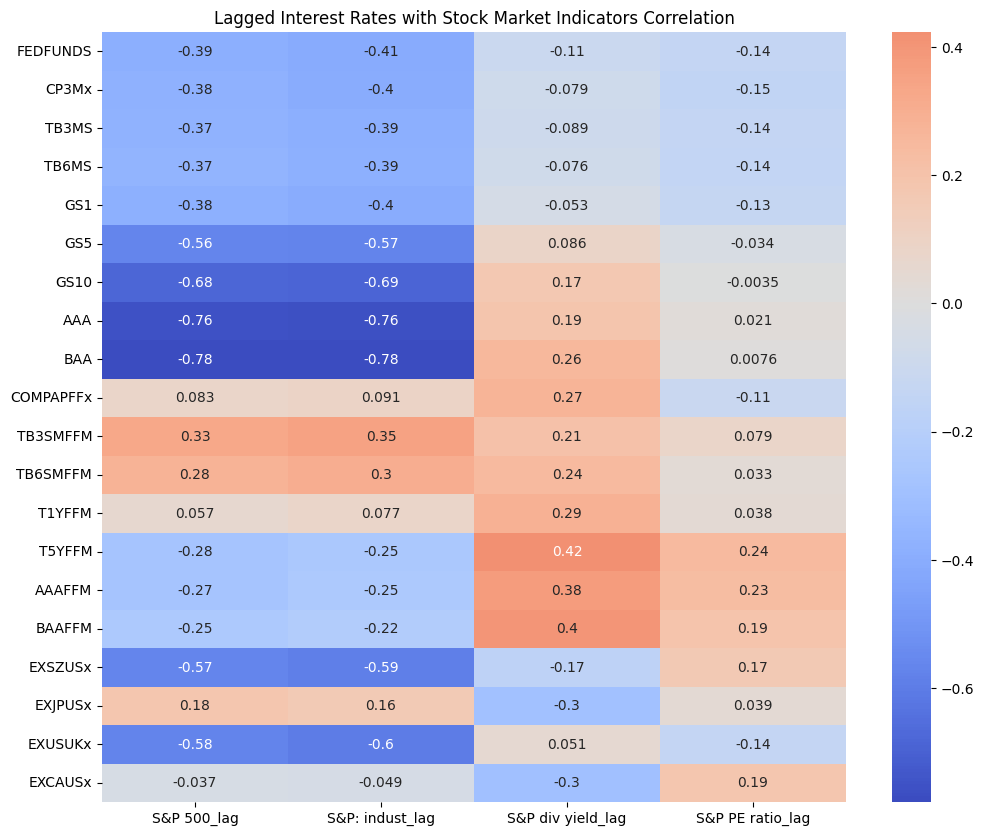

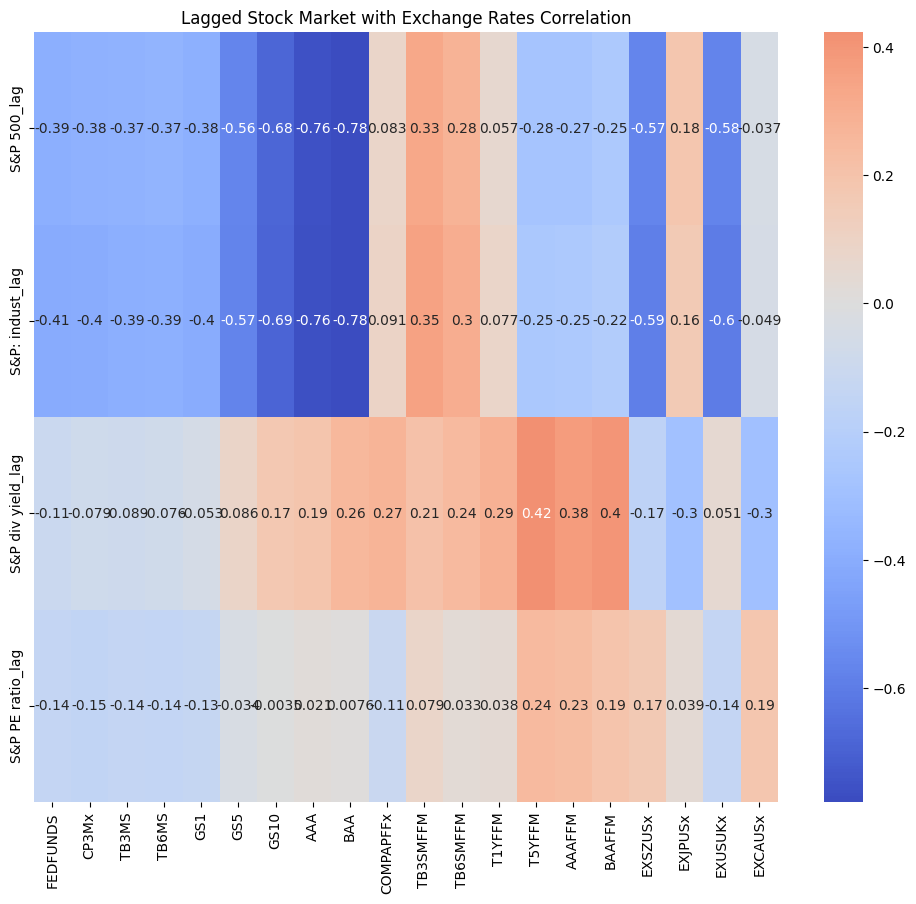

In [101]:
group_6_variables = ["FEDFUNDS", "CP3Mx", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA", "COMPAPFFx", "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "AAAFFM", "BAAFFM", "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]
group_8_variables = ["S&P 500", "S&P: indust", "S&P div yield", "S&P PE ratio"]

# Creating lagged versions of the interest rates and stock market indicators
lagged_interest_rates = data[group_6_variables].shift(2)
lagged_stock_market = data[group_8_variables].shift(2)

# Naming the lagged columns
lagged_interest_rates.columns = [col + '_lag' for col in group_6_variables]
lagged_stock_market.columns = [col + '_lag' for col in group_8_variables]

# Concatenate original data with the lagged data
data_lagged = pd.concat([data, lagged_interest_rates, lagged_stock_market], axis=1).dropna()

# Compute the correlation matrix for lagged interest rates with stock market
correlation_matrix_1 = data_lagged[group_6_variables + [col + '_lag' for col in group_8_variables]].corr().loc[group_6_variables, [col + '_lag' for col in group_8_variables]]

# Compute the correlation matrix for lagged stock market with exchange rates
correlation_matrix_2 = data_lagged[[col + '_lag' for col in group_8_variables] + group_6_variables].corr().loc[[col + '_lag' for col in group_8_variables], group_6_variables]

# Plotting the heatmaps
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title("Lagged Interest Rates with Stock Market Indicators Correlation")
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title("Lagged Stock Market with Exchange Rates Correlation")
plt.show()